In [31]:
import numpy as np
import pandas as pd
import itertools
import random

def square_find(x, y):
    if x in np.arange(0,3) and y in np.arange(0,3): return 0
    if x in np.arange(0,3) and y in np.arange(3,6): return 1
    if x in np.arange(0,3) and y in np.arange(6,9): return 2
    
    if x in np.arange(3,6) and y in np.arange(0,3): return 3
    if x in np.arange(3,6) and y in np.arange(3,6): return 4
    if x in np.arange(3,6) and y in np.arange(6,9): return 5
    
    if x in np.arange(6,9) and y in np.arange(0,3): return 6
    if x in np.arange(6,9) and y in np.arange(3,6): return 7
    if x in np.arange(6,9) and y in np.arange(6,9): return 8
    
squareInd = pd.DataFrame([[x , y, square_find(x, y)] for x in np.arange(9) for y in np.arange(9)], columns = ['x', 'y', 'square'])

def square_ind(x):
    sqdfs = squareInd.loc[squareInd.square == x,['x', 'y']]
    return np.unique(sqdfs.x), np.unique(sqdfs.y)

Colorz = np.array(["Red", "Orange", "Yellow", "Dark Green", "Light Green", "Dark Blue", "Light Blue", "Dark Purple", "Light Purple"])

In [32]:
pvec = [None, None, None, 'Dark Green', 'Red', None, 'Dark Purple', 'Yellow', None, 'Dark Purple', None, None, None, None, None, 'Light Purple', None, 'Dark Blue', 'Red', 'Dark Blue', 'Light Green', None, None, 'Dark Purple', None, 'Orange', None, 'Yellow', 'Dark Green', 'Light Purple', 'Red', None, None, 'Light Blue', None, None, 'Orange', None, None, None, 'Light Blue', None, None, None, 'Dark Green', None, None, 'Dark Blue', None, None, 'Dark Green', 'Orange', 'Light Purple', 'Red', None, 'Dark Purple', None, 'Orange', None, None, 'Dark Blue', 'Light Blue', 'Light Purple', 'Light Purple', None, 'Light Blue', None, None, None, None, None, 'Yellow', None, 'Light Green', 'Yellow', None, 'Dark Purple', 'Light Blue', None, None, None]

p2 = [pvec[(i*9):(9*(i + 1))] for i in np.arange(9)]

In [34]:
nval = np.concatenate(puzzdf.values)
p3 = [nval[(i*9):(9*(i + 1))] for i in np.arange(9)]

In [37]:
pd.DataFrame(p3)

,0,1,2,3,4,5,6,7,8
0,None,None,None,Dark Green,Red,None,Dark Purple,Yellow,None
1,Dark Purple,None,None,None,None,None,Light Purple,None,Dark Blue
2,Red,Dark Blue,Light Green,None,None,Dark Purple,None,Orange,None
3,Yellow,Dark Green,Light Purple,Red,None,None,Light Blue,None,None
4,Orange,None,None,None,Light Blue,None,None,None,Dark Green
5,None,None,Dark Blue,None,None,Dark Green,Orange,Light Purple,Red
6,None,Dark Purple,None,Orange,None,None,Dark Blue,Light Blue,Light Purple
7,Light Purple,None,Light Blue,None,None,None,None,None,Yellow
8,None,Light Green,Yellow,None,Dark Purple,Light Blue,None,None,None


In [33]:
puzzdf = pd.DataFrame(p2)
possdf = puzzdf.copy()
puzzdf

,0,1,2,3,4,5,6,7,8
0,None,None,None,Dark Green,Red,None,Dark Purple,Yellow,None
1,Dark Purple,None,None,None,None,None,Light Purple,None,Dark Blue
2,Red,Dark Blue,Light Green,None,None,Dark Purple,None,Orange,None
3,Yellow,Dark Green,Light Purple,Red,None,None,Light Blue,None,None
4,Orange,None,None,None,Light Blue,None,None,None,Dark Green
5,None,None,Dark Blue,None,None,Dark Green,Orange,Light Purple,Red
6,None,Dark Purple,None,Orange,None,None,Dark Blue,Light Blue,Light Purple
7,Light Purple,None,Light Blue,None,None,None,None,None,Yellow
8,None,Light Green,Yellow,None,Dark Purple,Light Blue,None,None,None


## Solve

### First Pass

In [5]:
for i in np.arange(9):
    for j in np.arange(9):
        if puzzdf.iloc[i, j] == None:
            rvals = puzzdf.iloc[i,:].values
            rvals = rvals[rvals != None]
            
            cvals = puzzdf.iloc[:,j].values
            cvals = cvals[cvals != None]
            
            square = square_find(i, j)
            sqi = squareInd.loc[squareInd.square == square,:]
            svals = puzzdf.iloc[np.unique(sqi.x), np.unique(sqi.y)].values
            svals = svals[svals != None]
            
            nsc = [not(col in np.unique(np.concatenate((rvals, cvals, svals)))) for col in Colorz]
            possdf.iloc[i,j] = Colorz[nsc]
        else:
            possdf.iloc[i,j] = np.array([puzzdf.iloc[i,j]])
        
possdf_initial = possdf.copy()

### Unique Color in each row, column, and square

In [6]:
rowcols = []
colcols = []
sqcols = []
for k in np.arange(9):
    icol = possdf.iloc[k,:]
    ucol, colcount = np.unique(np.concatenate(icol.values), return_counts = True)
    ucol = ucol[colcount == 1]
    
    rowcols.append(ucol)
    
    icol = possdf.iloc[:,k]
    ucol, colcount = np.unique(np.concatenate(icol.values), return_counts = True)
    ucol = ucol[colcount == 1]
    
    colcols.append(ucol)
    
    i, j = square_ind(k)
    
    icol = possdf.iloc[i,j]
    ucol, colcount = np.unique(np.concatenate(np.concatenate(icol.values)), return_counts = True)
    ucol = ucol[colcount == 1]
    
    sqcols.append(ucol)



### Check for unique colors in each cell and substitute

In [7]:
for i in np.arange(9):
    for j in np.arange(9):
        cval = possdf.iloc[i,j]
        if len(cval) > 1:
            sqnum = square_find(i,j)
            icol = rowcols[i]
            jcol = colcols[j]
            kcol = sqcols[sqnum]
            ucol = np.unique(np.concatenate((icol, jcol, kcol)))
            ici = [ic in ucol for ic in cval]
            if any(ici):
                possdf.iloc[i,j] = cval[ici]


## Check to make sure no repeats for cells with single values

In [8]:
rowcols = []
colcols = []
sqcols = []
error_list = []
for k in np.arange(9):
    icol = possdf.iloc[k,:]
    ucol, colcount = np.unique((np.concatenate([x for x in icol if len(x) == 1 ])), return_counts = True)
    if any(colcount >1):
        error_list.append("error! multiple " + ', '.join(ucol[colcount > 1])+ " in row " + str(k))
        
    icol = possdf.iloc[:,k]
    ucol, colcount = np.unique((np.concatenate([x for x in icol if len(x) == 1 ])), return_counts = True)
    if any(colcount >1):
        error_list.append("error! multiple " + ', '.join(ucol[colcount > 1])+ " in column " + str(k)) 
        
    i, j = square_ind(k)
    icol = np.concatenate(possdf.iloc[i,j].values)
    ucol, colcount = np.unique(np.concatenate([x for x in icol if len(x) == 1 ]), return_counts = True)
    if any(colcount >1):
        error_list.append("error! multiple " + ', '.join(ucol[colcount > 1])+ " in square " + str(k))

    


In [21]:
len([])

0

## Puzzle complete check

In [9]:
not any(possdf.applymap(lambda x: len(x) > 1))

False

## Puzzle changed

In [10]:
possdf.equals(possdf_initial)

False

## Show answers

In [11]:
def isn1(x):
    if pd.isnull(x):
        return 1
    else:
        return 0
    
def lg1(x):
    if len(x) == 1:
        return 1
    else:
        return 0
    
puzzna = puzzdf.applymap(isn1) 
possna = possdf.applymap(lg1) 

missx, missy = np.where((puzzna + possna) == 2)    

### Reveal all

In [12]:
puzzdf2 = puzzdf.copy()

for k in np.arange(len(missx)):
    puzzdf2.iloc[missx[k], missy[k]] = possdf.iloc[missx[k], missy[k]][0]

### Reveal 1 random

In [13]:
puzzdf2 = puzzdf.copy()
k = random.randint(0, len(missx)-1)
locx, locy = missx[k], missy[k]
puzzdf2.iloc[locx, locy] = possdf.iloc[locx, locy][0]

## Class test

In [16]:
import numpy as np
import pandas as pd
import random
from plotnine import *

################################## Helper Functions and values START ##############################################################
# Outputs the square in which a cell resides
def square_find(x, y):
    if x in np.arange(0,3) and y in np.arange(0,3): return 0
    if x in np.arange(0,3) and y in np.arange(3,6): return 1
    if x in np.arange(0,3) and y in np.arange(6,9): return 2

    if x in np.arange(3,6) and y in np.arange(0,3): return 3
    if x in np.arange(3,6) and y in np.arange(3,6): return 4
    if x in np.arange(3,6) and y in np.arange(6,9): return 5

    if x in np.arange(6,9) and y in np.arange(0,3): return 6
    if x in np.arange(6,9) and y in np.arange(3,6): return 7
    if x in np.arange(6,9) and y in np.arange(6,9): return 8

# outputs a df of where each cell resides.
squareInd = pd.DataFrame([[x , y, square_find(x, y)] for x in np.arange(9) for y in np.arange(9)], columns = ['x', 'y', 'square'])
# Finds all the cells for each square
def square_ind(x):
    sqdfs = squareInd.loc[squareInd.square == x,['x', 'y']]
    return np.unique(sqdfs.x), np.unique(sqdfs.y)

# Color reference
Colorz = np.array(["Red", "Orange", "Yellow", "Dark Green", "Light Green", "Dark Blue", "Light Blue", "Dark Purple", "Light Purple"])

# Colors for plotting
hexCol = np.array(["#e0c787", "#d62724", "#ff9443", "#eae22d", "#89ca42", "#36763e", "#a2ccd5", "#324590", "#d2a9be", "#662f9f"])
colRef = ['White', "Red", "Orange", "Yellow", "Light Green", "Dark Green", "Light Blue", "Dark Blue", "Light Purple", "Dark Purple"]

#### PART of Cell update
def isn1(x):
    if pd.isnull(x):
        return 1
    else:
        return 0

def lg1(x):
    if len(x) == 1:
        return 1
    else:
        return 0

### Board Plot
def board_plot(pzmelt):
        p = (ggplot(pzmelt)
         + aes(x = 'j', y = 'i')
         + coord_fixed()
         + geom_hline(yintercept = 2.5, size = 2)
         + geom_hline(yintercept = 5.5, size = 2)
         + geom_vline(xintercept = 2.5, size = 2)
         + geom_vline(xintercept = 5.5, size = 2)
         + geom_point(size = 17, color = 'black')
         + aes(color = 'color')
         + geom_point(size =15)
         + scale_color_manual(breaks = colRef, values = hexCol, guide = False)
         + xlim([-.1, 8.1])
         + ylim([-.1, 8.1])
         + theme_void()
         + theme(rect=element_rect(color='black', size=3, fill='#EEBB0050')))
        return p
################################## Helper Functions and values END ##############################################################


class ckPuzzle:

####################################  initialize puzzle to grid  #############################################
    def __init__(self, puzzle_vector):
        p2 = [puzzle_vector[(i*9):(9*(i + 1))] for i in np.arange(9)]
        puzzdf = pd.DataFrame(p2)
        possdf = puzzdf.copy()
        self.puzzdf = puzzdf

####################################  check to see if each cell on the board can be solved independent of other cells  #############################################
    def solve1step(self):
        possdf = self.puzzdf.copy()
        puzzdf = self.puzzdf

        ## First pass
        #### Look at all possibilities of each cell, given its' square, row, and column
        for i in np.arange(9):
            for j in np.arange(9):
                if puzzdf.iloc[i, j] == None:
                    rvals = puzzdf.iloc[i,:].values
                    rvals = rvals[rvals != None]

                    cvals = puzzdf.iloc[:,j].values
                    cvals = cvals[cvals != None]

                    square = square_find(i, j)
                    sqi = squareInd.loc[squareInd.square == square,:]
                    svals = puzzdf.iloc[np.unique(sqi.x), np.unique(sqi.y)].values
                    svals = svals[svals != None]

                    nsc = [not(col in np.unique(np.concatenate((rvals, cvals, svals)))) for col in Colorz]
                    possdf.iloc[i,j] = Colorz[nsc]
                else:
                    possdf.iloc[i,j] = np.array([puzzdf.iloc[i,j]])

        ## Second Pass
        #### Unique Color in each row, column, and square
        rowcols = []
        colcols = []
        sqcols = []
        for k in np.arange(9):
            icol = possdf.iloc[k,:]
            ucol, colcount = np.unique(np.concatenate(icol.values), return_counts = True)
            ucol = ucol[colcount == 1]

            rowcols.append(ucol)

            icol = possdf.iloc[:,k]
            ucol, colcount = np.unique(np.concatenate(icol.values), return_counts = True)
            ucol = ucol[colcount == 1]

            colcols.append(ucol)

            i, j = square_ind(k)

            icol = possdf.iloc[i,j]
            ucol, colcount = np.unique(np.concatenate(np.concatenate(icol.values)), return_counts = True)
            ucol = ucol[colcount == 1]

            sqcols.append(ucol)

        #### Check for unique colors in each cell and substitute
        for i in np.arange(9):
            for j in np.arange(9):
                cval = possdf.iloc[i,j]
                if len(cval) > 1:
                    sqnum = square_find(i,j)
                    icol = rowcols[i]
                    jcol = colcols[j]
                    kcol = sqcols[sqnum]
                    ucol = np.unique(np.concatenate((icol, jcol, kcol)))
                    ici = [ic in ucol for ic in cval]
                    if any(ici):
                        possdf.iloc[i,j] = cval[ici]

        self.possdf = possdf
        #identifies if an of the cells are able to be updated given the logic, and the cordinates of where the cell changes occur
        puzzna = self.puzzdf.applymap(isn1)
        possna = self.possdf.applymap(lg1)
        self.missx, self.missy = np.where((puzzna + possna) == 2)

    ## Looks to check if a cell was somehow incorrectly specified. My R version allowed this somehow if the puzzle was wrong.
    def errorCheck(self):
        rowcols = []
        colcols = []
        sqcols = []
        error_list = []
        for k in np.arange(9):
            icol = self.possdf.iloc[k,:]

            xvec = [x for x in icol if len(x) == 1 ]
            if len(xvec)>0:
                ucol, colcount = np.unique((np.concatenate(xvec)), return_counts = True)
                if any(colcount >1):
                    error_list.append("Problem with puzzle!\n Algorithm found multiple " + ', '.join(ucol[colcount > 1])+ " in row " + str(k))

            icol = self.possdf.iloc[:,k]
            xvec = [x for x in icol if len(x) == 1 ]
            if len(xvec)>0:
                ucol, colcount = np.unique((np.concatenate(xvec)), return_counts = True)
                if any(colcount >1):
                    error_list.append("Problem with puzzle!\n Algorithm found multiple " + ', '.join(ucol[colcount > 1])+ " in column " + str(k))

            i, j = square_ind(k)
            icol = np.concatenate(self.possdf.iloc[i,j].values)
            xvec = [x for x in icol if len(x) == 1 ]
            if len(xvec)>0:
                ucol, colcount = np.unique(np.concatenate(xvec), return_counts = True)
                if any(colcount >1):
                    error_list.append("Problem with puzzle!\n Algorithm found multiple " + ', '.join(ucol[colcount > 1])+ " in square " + str(k))

        if len(error_list) > 0:
            return error_list
        else:
            return "No error"

    ## Check if the puzzle was completed with this step.
    def complete_check(self):
        return not any(np.concatenate(self.possdf.applymap(lambda x: len(x) > 1).values))


    #### Check if any cells updated_cells. Important for if the puzzle cannot be solved with the provided logic.
    def puzz_change(self):
        if len(self.missx) > 0:
            return True
        else:
            return False

    ## Update the puzzle in the form of a df and vector. You can choose to only update 1 cell or all available.
    def puzzle_update(self, reveal = "one"):
        puzzdf2 = self.puzzdf.copy()
        if reveal == "one":
            k = random.randint(0, len(self.missx)-1)
            locx, locy = self.missx[k], self.missy[k]
            puzzdf2.iloc[locx, locy] = self.possdf.iloc[locx, locy][0]
            self.locx, self.locy = locx, locy
        if reveal == "all":
            self.locx, self.locy = self.missx, self.missy
            for k in np.arange(len(self.missx)):
                puzzdf2.iloc[self.missx[k], self.missy[k]] = self.possdf.iloc[self.missx[k], self.missy[k]][0]

        self.puzzdf_update = puzzdf2
        self.puzzdf_update_values = np.concatenate(self.puzzdf_update.values)


    def plt_puzz(self):
        pzmelt = self.puzzdf.melt(var_name = ['j'], value_name = 'color', ignore_index = False).reset_index()
        pzmelt = pzmelt.rename(columns = {'index': 'i'})
        pzmelt.i = 8-pzmelt.i
        pzmelt.j = pzmelt.j
        pzmelt['color'] = np.where(pzmelt['color'].isnull(), 'White', pzmelt['color'])
        pzmelt['hexCol'] = np.concatenate([hexCol[[cr == x for cr in colRef]] for x in pzmelt.color])
        p = board_plot(pzmelt)

        return p

    def plt_puzz_update(self, show_updated_values = True):
        if show_updated_values:
            pzmelt = self.puzzdf_update.melt(var_name = ['j'], value_name = 'color', ignore_index = False).reset_index()
        if not show_updated_values:
            pzmelt = self.puzzdf.melt(var_name = ['j'], value_name = 'color', ignore_index = False).reset_index()
        pzmelt = pzmelt.rename(columns = {'index': 'i'})
        pzmelt.i = 8-pzmelt.i
        pzmelt.j = pzmelt.j
        pzmelt['color'] = np.where(pzmelt['color'].isnull(), 'White', pzmelt['color'])
        pzmelt['hexCol'] = np.concatenate([hexCol[[cr == x for cr in colRef]] for x in pzmelt.color])
        p = board_plot(pzmelt)

        if type(self.locx) == 'numpy.int64':
            p = p +  geom_point(y = 8-self.locx, x = self.locy, data = updates, size = 10, color = 'black', shape = 'x', stroke = 2)
        else:
            updates = pd.DataFrame(list(zip(8-self.locx, self.locy)), columns = ['locx', 'locy'])
            p = p +  geom_point(aes(y = 'locx', x = 'locy'), data = updates, size = 10, color = 'black', shape = 'x', stroke = 2)

        return p




####################################  Attempts to solve puzzle to completion  #############################################
def puzzle_solver(puzzle_vector):
    cont = True
    while cont:
        mypuz = ckPuzzle(puzzle_vector)
        mypuz.solve1step()
        mypuz.puzzle_update(reveal = "all")
        ## Stop if there is an error, if the puzzle hadn't changed from the last iteration, or if the puzzle is complete
        cont = (mypuz.errorCheck() == "No error") and (mypuz.puzz_change()) and (not mypuz.complete_check())
        if cont:
            puzzle_vector = mypuz.puzzdf_update_values
    ## Message and output handler
    if (mypuz.errorCheck() != "No error"):
        return mypuz.errorCheck()
    if (not mypuz.puzz_change()) and (not mypuz.complete_check()):
        print("Logic got stuck at...")
        return mypuz.puzzdf_update
    if mypuz.complete_check():
        print("puzzle completed!")
        return mypuz.puzzdf_update


In [17]:
pz = ckPuzzle(ckDict['4'])
pz.solve1step()
pz.puzzle_update('one')
pz.plt_puzz_update(False)

TypeError: 'numpy.int64' object is not iterable

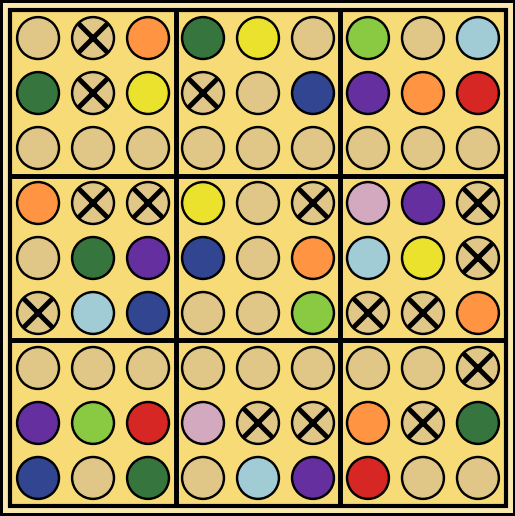

<ggplot: (123464791992)>

In [1]:
import numpy as np
import pandas as pd
import random
from plotnine import *

################################## Helper Functions and values START ##############################################################
# Outputs the square in which a cell resides
def square_find(x, y):
    if x in np.arange(0,3) and y in np.arange(0,3): return 0
    if x in np.arange(0,3) and y in np.arange(3,6): return 1
    if x in np.arange(0,3) and y in np.arange(6,9): return 2

    if x in np.arange(3,6) and y in np.arange(0,3): return 3
    if x in np.arange(3,6) and y in np.arange(3,6): return 4
    if x in np.arange(3,6) and y in np.arange(6,9): return 5

    if x in np.arange(6,9) and y in np.arange(0,3): return 6
    if x in np.arange(6,9) and y in np.arange(3,6): return 7
    if x in np.arange(6,9) and y in np.arange(6,9): return 8

# outputs a df of where each cell resides.
squareInd = pd.DataFrame([[x , y, square_find(x, y)] for x in np.arange(9) for y in np.arange(9)], columns = ['x', 'y', 'square'])
# Finds all the cells for each square
def square_ind(x):
    sqdfs = squareInd.loc[squareInd.square == x,['x', 'y']]
    return np.unique(sqdfs.x), np.unique(sqdfs.y)

# Color reference
Colorz = np.array(["Red", "Orange", "Yellow", "Dark Green", "Light Green", "Dark Blue", "Light Blue", "Dark Purple", "Light Purple"])

# Colors for plotting
hexCol = np.array(["#e0c787", "#d62724", "#ff9443", "#eae22d", "#89ca42", "#36763e", "#a2ccd5", "#324590", "#d2a9be", "#662f9f"])
colRef = ['White', "Red", "Orange", "Yellow", "Light Green", "Dark Green", "Light Blue", "Dark Blue", "Light Purple", "Dark Purple"]

#### PART of Cell update
def isn1(x):
    if pd.isnull(x):
        return 1
    else:
        return 0

def lg1(x):
    if len(x) == 1:
        return 1
    else:
        return 0

### Board Plot
def board_plot(pzmelt):
        p = (ggplot(pzmelt)
         + aes(x = 'j', y = 'i')
         + coord_fixed()
         + geom_hline(yintercept = 2.5, size = 2)
         + geom_hline(yintercept = 5.5, size = 2)
         + geom_vline(xintercept = 2.5, size = 2)
         + geom_vline(xintercept = 5.5, size = 2)
         + geom_point(size = 17, color = 'black')
         + aes(color = 'color')
         + geom_point(size =15)
         + scale_color_manual(breaks = colRef, values = hexCol, guide = False)
         + xlim([-.1, 8.1])
         + ylim([-.1, 8.1])
         + theme_void()
         + theme(rect=element_rect(color='black', size=3, fill='#EEBB0050')))
        return p
################################## Helper Functions and values END ##############################################################


class ckPuzzle:

####################################  initialize puzzle to grid  #############################################
    def __init__(self, puzzle_vector):
        p2 = [puzzle_vector[(i*9):(9*(i + 1))] for i in np.arange(9)]
        puzzdf = pd.DataFrame(p2)
        possdf = puzzdf.copy()
        self.puzzdf = puzzdf

####################################  check to see if each cell on the board can be solved independent of other cells  #############################################
    def solve1step(self):
        possdf = self.puzzdf.copy()
        puzzdf = self.puzzdf

        ## First pass
        #### Look at all possibilities of each cell, given its' square, row, and column
        for i in np.arange(9):
            for j in np.arange(9):
                if puzzdf.iloc[i, j] == None:
                    rvals = puzzdf.iloc[i,:].values
                    rvals = rvals[rvals != None]

                    cvals = puzzdf.iloc[:,j].values
                    cvals = cvals[cvals != None]

                    square = square_find(i, j)
                    sqi = squareInd.loc[squareInd.square == square,:]
                    svals = puzzdf.iloc[np.unique(sqi.x), np.unique(sqi.y)].values
                    svals = svals[svals != None]

                    nsc = [not(col in np.unique(np.concatenate((rvals, cvals, svals)))) for col in Colorz]
                    possdf.iloc[i,j] = Colorz[nsc]
                else:
                    possdf.iloc[i,j] = np.array([puzzdf.iloc[i,j]])

        ## Second Pass
        #### Unique Color in each row, column, and square
        rowcols = []
        colcols = []
        sqcols = []
        for k in np.arange(9):
            icol = possdf.iloc[k,:]
            ucol, colcount = np.unique(np.concatenate(icol.values), return_counts = True)
            ucol = ucol[colcount == 1]

            rowcols.append(ucol)

            icol = possdf.iloc[:,k]
            ucol, colcount = np.unique(np.concatenate(icol.values), return_counts = True)
            ucol = ucol[colcount == 1]

            colcols.append(ucol)

            i, j = square_ind(k)

            icol = possdf.iloc[i,j]
            ucol, colcount = np.unique(np.concatenate(np.concatenate(icol.values)), return_counts = True)
            ucol = ucol[colcount == 1]

            sqcols.append(ucol)

        #### Check for unique colors in each cell and substitute
        for i in np.arange(9):
            for j in np.arange(9):
                cval = possdf.iloc[i,j]
                if len(cval) > 1:
                    sqnum = square_find(i,j)
                    icol = rowcols[i]
                    jcol = colcols[j]
                    kcol = sqcols[sqnum]
                    ucol = np.unique(np.concatenate((icol, jcol, kcol)))
                    ici = [ic in ucol for ic in cval]
                    if any(ici):
                        possdf.iloc[i,j] = cval[ici]

        self.possdf = possdf
        #identifies if an of the cells are able to be updated given the logic, and the cordinates of where the cell changes occur
        puzzna = self.puzzdf.applymap(isn1)
        possna = self.possdf.applymap(lg1)
        self.missx, self.missy = np.where((puzzna + possna) == 2)

    ## Looks to check if a cell was somehow incorrectly specified. My R version allowed this somehow if the puzzle was wrong.
    def errorCheck(self):
        rowcols = []
        colcols = []
        sqcols = []
        error_list = []
        for k in np.arange(9):
            icol = self.possdf.iloc[k,:]

            xvec = [x for x in icol if len(x) == 1 ]
            if len(xvec)>0:
                ucol, colcount = np.unique((np.concatenate(xvec)), return_counts = True)
                if any(colcount >1):
                    error_list.append("Problem with puzzle!\n Algorithm found multiple " + ', '.join(ucol[colcount > 1])+ " in row " + str(k))

            icol = self.possdf.iloc[:,k]
            xvec = [x for x in icol if len(x) == 1 ]
            if len(xvec)>0:
                ucol, colcount = np.unique((np.concatenate(xvec)), return_counts = True)
                if any(colcount >1):
                    error_list.append("Problem with puzzle!\n Algorithm found multiple " + ', '.join(ucol[colcount > 1])+ " in column " + str(k))

            i, j = square_ind(k)
            icol = np.concatenate(self.possdf.iloc[i,j].values)
            xvec = [x for x in icol if len(x) == 1 ]
            if len(xvec)>0:
                ucol, colcount = np.unique(np.concatenate(xvec), return_counts = True)
                if any(colcount >1):
                    error_list.append("Problem with puzzle!\n Algorithm found multiple " + ', '.join(ucol[colcount > 1])+ " in square " + str(k))

        if len(error_list) > 0:
            return error_list
        else:
            return "No error"

    ## Check if the puzzle was completed with this step.
    def complete_check(self):
        return not any(np.concatenate(self.possdf.applymap(lambda x: len(x) > 1).values))


    #### Check if any cells updated_cells. Important for if the puzzle cannot be solved with the provided logic.
    def puzz_change(self):
        if len(self.missx) > 0:
            return True
        else:
            return False

    ## Update the puzzle in the form of a df and vector. You can choose to only update 1 cell or all available.
    def puzzle_update(self, reveal = "one"):
        puzzdf2 = self.puzzdf.copy()
        if reveal == "one":
            k = random.randint(0, len(self.missx)-1)
            locx, locy = self.missx[k], self.missy[k]
            puzzdf2.iloc[locx, locy] = self.possdf.iloc[locx, locy][0]
            self.locx, self.locy = locx, locy
        if reveal == "all":
            self.locx, self.locy = self.missx, self.missy
            for k in np.arange(len(self.missx)):
                puzzdf2.iloc[self.missx[k], self.missy[k]] = self.possdf.iloc[self.missx[k], self.missy[k]][0]

        self.puzzdf_update = puzzdf2
        self.puzzdf_update_values = np.concatenate(self.puzzdf_update.values)


    def plt_puzz(self):
        pzmelt = self.puzzdf.melt(var_name = ['j'], value_name = 'color', ignore_index = False).reset_index()
        pzmelt = pzmelt.rename(columns = {'index': 'i'})
        pzmelt.i = 8-pzmelt.i
        pzmelt.j = pzmelt.j
        pzmelt['color'] = np.where(pzmelt['color'].isnull(), 'White', pzmelt['color'])
        pzmelt['hexCol'] = np.concatenate([hexCol[[cr == x for cr in colRef]] for x in pzmelt.color])
        p = board_plot(pzmelt)

        return p

    def plt_puzz_update(self, show_updated_values = True):
        if show_updated_values:
            pzmelt = self.puzzdf_update.melt(var_name = ['j'], value_name = 'color', ignore_index = False).reset_index()
        if not show_updated_values:
            pzmelt = self.puzzdf.melt(var_name = ['j'], value_name = 'color', ignore_index = False).reset_index()
        pzmelt = pzmelt.rename(columns = {'index': 'i'})
        pzmelt.i = 8-pzmelt.i
        pzmelt.j = pzmelt.j
        pzmelt['color'] = np.where(pzmelt['color'].isnull(), 'White', pzmelt['color'])
        pzmelt['hexCol'] = np.concatenate([hexCol[[cr == x for cr in colRef]] for x in pzmelt.color])
        p = board_plot(pzmelt)

        if not isinstance(self.locx, np.ndarray):
            py = 8-self.locx
            px = self.locy
            
            p = p +  geom_point(y = py, x = px,  size = 10, color = 'black', shape = 'x', stroke = 2)
        if isinstance(self.locx, np.ndarray):
            updates = pd.DataFrame(list(zip(8-self.locx, self.locy)), columns = ['locx', 'locy'])
            p = p +  geom_point(aes(y = 'locx', x = 'locy'), data = updates, size = 10, color = 'black', shape = 'x', stroke = 2)

        return p




####################################  Attempts to solve puzzle to completion  #############################################
def puzzle_solver(puzzle_vector):
    cont = True
    while cont:
        mypuz = ckPuzzle(puzzle_vector)
        mypuz.solve1step()
        mypuz.puzzle_update(reveal = "all")
        ## Stop if there is an error, if the puzzle hadn't changed from the last iteration, or if the puzzle is complete
        cont = (mypuz.errorCheck() == "No error") and (mypuz.puzz_change()) and (not mypuz.complete_check())
        if cont:
            puzzle_vector = mypuz.puzzdf_update_values
    ## Message and output handler
    if (mypuz.errorCheck() != "No error"):
        return mypuz.errorCheck()
    if (not mypuz.puzz_change()) and (not mypuz.complete_check()):
        print("Logic got stuck at...")
        return mypuz.puzzdf_update
    if mypuz.complete_check():
        print("puzzle completed!")
        return mypuz.puzzdf_update


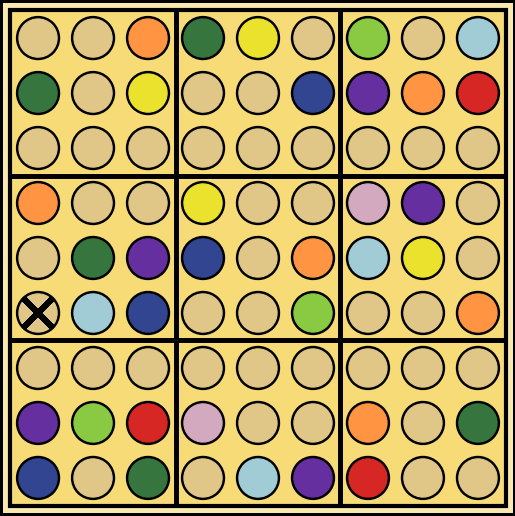

<ggplot: (97167949300)>

In [7]:
pz = ckPuzzle(ckDict['4'])
pz.solve1step()
pz.puzzle_update('one')
pz.plt_puzz_update(show_updated_values = False)

In [3]:
ckDict = {
  '1': [None, None, None, 'Dark Green', 'Red', None, 'Dark Purple', 'Yellow', None, 'Dark Purple', None, None, None, None, None, 'Light Purple', None, 'Dark Blue', 'Red', 'Dark Blue', 'Light Green', None, None, 'Dark Purple', None, 'Orange', None, 'Yellow', 'Dark Green', 'Light Purple', 'Red', None, None, 'Light Blue', None, None, 'Orange', None, None, None, 'Light Blue', None, None, None, 'Dark Green', None, None, 'Dark Blue', None, None, 'Dark Green', 'Orange', 'Light Purple', 'Red', None, 'Dark Purple', None, 'Orange', None, None, 'Dark Blue', 'Light Blue', 'Light Purple', 'Light Purple', None, 'Light Blue', None, None, None, None, None, 'Yellow', None, 'Light Green', 'Yellow', None, 'Dark Purple', 'Light Blue', None, None, None],
  '2': [None, 'Dark Blue', None, 'Light Purple', 'Orange', 'Dark Purple', 'Yellow', None, None, 'Yellow', None, None, None, None, None, 'Red', None, None, 'Light Blue', 'Dark Green', 'Orange', 'Yellow', None, None, 'Light Green', None, None, 'Dark Purple', 'Orange', 'Yellow', 'Dark Blue', None, None, 'Light Purple', 'Light Green', None, None, None, None, None, None, None, None, None, None, None, 'Red', 'Light Purple', None, None, 'Light Blue', 'Dark Purple', 'Dark Blue', 'Yellow', None, None, 'Dark Green', None, None, 'Light Green', 'Orange', 'Light Purple', 'Dark Purple', None, None, 'Dark Blue', None, None, None, None, None, 'Red', None, None, 'Light Blue', 'Red', 'Yellow', 'Light Purple', None, 'Dark Green', None],
  '3': ['Red', None, None, 'Yellow', None, None, None, 'Light Blue', None, 'Yellow', None, 'Dark Blue', 'Light Green', 'Dark Purple', 'Dark Green', 'Red', None, None, None, None, None, 'Light Blue', 'Orange', 'Red', None, None, 'Yellow', 'Light Blue', None, 'Yellow', None, None, None, 'Orange', None, None, None, 'Light Green', 'Light Purple', None, None, None, 'Light Blue', 'Red', None, None, None, 'Red', None, None, None, 'Dark Purple', None, 'Light Green', 'Dark Blue', None, None, 'Dark Green', 'Light Green', 'Yellow', None, None, None, None, None, 'Dark Purple', 'Light Purple', 'Red', 'Orange', 'Dark Blue', None, 'Light Blue', None, 'Orange', None, None, None, 'Dark Purple', None, None, 'Red'],
  '4': [None, None, 'Orange', 'Dark Green', 'Yellow', None, 'Light Green', None, 'Light Blue', 'Dark Green', None, 'Yellow', None, None, 'Dark Blue', 'Dark Purple', 'Orange', 'Red', None, None, None, None, None, None, None, None, None, 'Orange', None, None, 'Yellow', None, None, 'Light Purple', 'Dark Purple', None, None, 'Dark Green', 'Dark Purple', 'Dark Blue', None, 'Orange', 'Light Blue', 'Yellow', None, None, 'Light Blue', 'Dark Blue', None, None, 'Light Green', None, None, 'Orange', None, None, None, None, None, None, None, None, None, 'Dark Purple', 'Light Green', 'Red', 'Light Purple', None, None, 'Orange', None, 'Dark Green', 'Dark Blue', None, 'Dark Green', None, 'Light Blue', 'Dark Purple', 'Red', None, None],
  '5': [None, None, None, None, None, 'Light Blue', 'Orange', 'Dark Blue', None, None, 'Light Blue', None, None, None, 'Orange', 'Dark Green', None, 'Light Green', 'Red', None, 'Orange', 'Light Green', None, 'Dark Green', None, None, 'Light Blue', None, 'Yellow', None, None, None, 'Light Purple', None, 'Light Green', None, 'Light Purple', None, 'Red', 'Dark Purple', None, 'Dark Blue', 'Light Blue', None, 'Yellow', None, 'Dark Purple', None, 'Red', None, None, None, 'Orange', None, 'Yellow', None, None, 'Orange', None, 'Light Green', 'Dark Blue', None, 'Dark Purple', 'Orange', None, 'Dark Purple', 'Light Blue', None, None, None, 'Yellow', None, None, 'Light Green', 'Light Blue', 'Dark Blue', None, None, None, None, None],
  '6': ['Dark Blue', None, 'Dark Purple', 'Red', 'Light Blue', 'Orange', None, 'Yellow', None, None, 'Light Blue', 'Light Purple', None, None, 'Dark Green', 'Orange', None, None, None, None, 'Dark Green', None, None, None, 'Light Blue', None, None, None, 'Orange', None, 'Light Blue', 'Dark Purple', 'Light Green', 'Yellow', None, None, None, None, None, 'Orange', None, 'Red', None, None, None, None, None, 'Red', 'Dark Green', 'Dark Blue', 'Yellow', None, 'Light Green', None, None, None, 'Light Blue', None, None, None, 'Red', None, None, None, None, 'Orange', 'Light Green', None, None, 'Dark Blue', 'Light Purple', None, None, 'Dark Blue', None, 'Light Purple', 'Orange', 'Dark Purple', 'Light Green', None, 'Dark Green'],
  '7': [None, None, None, 'Yellow', 'Light Blue', 'Dark Purple', None, None, 'Light Purple', None, None, 'Dark Purple', 'Orange', 'Light Green', None, None, 'Dark Green', None, None, 'Orange', 'Light Purple', None, 'Dark Blue', None, None, None, None, None, 'Light Green', None, 'Dark Blue', 'Red', None, 'Orange', None, 'Dark Green', 'Orange', None, None, 'Dark Green', None, 'Yellow', None, None, 'Light Green', 'Dark Green', None, 'Red', None, 'Light Purple', 'Orange', None, 'Dark Blue', None, None, None, None, None, 'Dark Green', None, 'Dark Purple', 'Yellow', None, None, 'Dark Green', None, None, 'Yellow', 'Light Green', 'Light Blue', None, None, 'Yellow', None, None, 'Light Blue', 'Orange', 'Dark Blue', None, None, None],
  '8': [None, 'Yellow', 'Dark Blue', None, 'Red', None, 'Light Green', 'Dark Purple', 'Light Purple', None, None, 'Light Purple', 'Dark Purple', 'Light Blue', 'Dark Blue', 'Dark Green', 'Yellow', None, None, None, None, 'Yellow', None, None, 'Dark Blue', None, None, None, None, 'Yellow', None, None, None, None, None, 'Dark Green', 'Red', 'Dark Purple', None, None, None, None, None, 'Light Purple', 'Orange', 'Dark Green', None, None, None, None, None, 'Yellow', None, None, None, None, 'Red', None, None, 'Light Green', None, None, None, None, 'Light Green', 'Dark Purple', 'Dark Blue', 'Orange', 'Light Blue', 'Red', None, None, 'Yellow', 'Light Blue', 'Orange', None, 'Dark Green', None, 'Light Purple', 'Dark Blue', None],
  '9': [None, None, None, None, None, 'Dark Purple', None, 'Dark Blue', None, None, 'Dark Purple', 'Light Purple', None, None, 'Red', 'Dark Green', 'Orange', None, None, None, None, 'Light Purple', 'Dark Blue', None, None, 'Dark Purple', 'Light Blue', 'Yellow', None, 'Dark Purple', None, None, 'Light Green', None, 'Dark Green', 'Orange', 'Orange', None, 'Light Green', None, None, None, 'Light Blue', None, 'Dark Blue', 'Light Purple', 'Dark Green', None, 'Red', None, None, 'Dark Purple', None, 'Light Green', 'Light Blue', 'Orange', None, None, 'Light Green', 'Light Purple', None, None, None, None, 'Light Purple', 'Yellow', 'Dark Purple', None, None, 'Orange', 'Light Blue', None, None, 'Dark Blue', None, 'Light Blue', None, None, None, None, None],
  '10': ['Light Purple', None, 'Orange', None, 'Dark Blue', 'Yellow', None, None, None, 'Dark Purple', 'Light Green', None, None, 'Red', None, None, None, None, 'Yellow', None, None, None, None, None, None, 'Dark Green', 'Dark Blue', None, None, None, 'Light Green', 'Yellow', 'Dark Purple', None, 'Light Purple', 'Dark Green', 'Orange', None, None, 'Dark Blue', 'Light Purple', 'Dark Green', None, None, 'Light Blue', 'Dark Green', 'Light Purple', None, 'Red', 'Light Blue', 'Orange', None, None, None, 'Dark Blue', 'Light Blue', None, None, None, None, None, None, 'Light Green', None, None, None, None, 'Dark Green', None, None, 'Dark Blue', 'Dark Purple', None, None, None, 'Light Blue', 'Dark Purple', None, 'Light Purple', None, 'Orange'],
  '11': [None, None, None, None, None, 'Light Green', None, None, None, None, 'Dark Green', 'Light Green', None, 'Red', None, 'Orange', 'Dark Blue', None, None, 'Light Blue', None, 'Dark Blue', 'Dark Purple', None, 'Light Green', 'Yellow', 'Dark Green', None, 'Orange', None, 'Dark Purple', None, None, None, 'Red', 'Light Green', None, None, 'Red', None, 'Light Blue', None, 'Yellow', None, None, 'Light Green', 'Dark Blue', None, None, None, 'Red', None, 'Light Purple', None, 'Yellow', 'Light Purple', 'Dark Green', None, 'Dark Blue', 'Light Blue', None, 'Light Green', None, None, 'Light Green', 'Dark Purple', None, 'Orange', None, 'Red', 'Light Blue', None, None, None, None, 'Yellow', None, None, None, None, None],
  '12': [None, None, None, None, None, 'Light Green', None, None, None, None, 'Yellow', 'Dark Blue', None, 'Dark Green', 'Dark Purple', 'Light Blue', None, None, 'Light Green', 'Dark Purple', 'Light Purple', None, None, 'Light Blue', 'Dark Green', 'Dark Blue', None, 'Dark Blue', 'Dark Green', None, None, None, 'Red', None, None, None, 'Red', None, 'Light Green', None, 'Dark Blue', None, 'Dark Purple', None, 'Orange', None, None, None, 'Light Blue', None, None, None, 'Light Green', 'Red', None, 'Orange', 'Red', 'Dark Green', None, None, 'Light Purple', 'Dark Purple', 'Light Blue', None, None, 'Dark Green', 'Dark Purple', 'Light Blue', None, 'Red', 'Orange', None, None, None, None, 'Red', None, None, None, None, None],
  '13': ['Yellow', None, 'Dark Green', None, None, None, None, None, None, 'Light Green', None, 'Light Purple', None, 'Dark Blue', None, 'Red', 'Dark Green', 'Dark Purple', 'Orange', None, None, None, None, 'Light Blue', 'Light Green', None, None, 'Dark Green', None, 'Light Blue', None, 'Red', 'Dark Blue', None, None, None, None, None, 'Yellow', 'Light Green', 'Light Blue', 'Light Purple', 'Orange', None, None, None, None, None, 'Dark Green', 'Yellow', None, 'Light Blue', None, 'Dark Blue', None, None, 'Light Green', 'Light Blue', None, None, None, None, 'Orange', 'Dark Blue', 'Light Purple', 'Dark Purple', None, 'Orange', None, 'Dark Green', None, 'Red', None, None, None, None, None, None, 'Light Purple', None, 'Light Green'],
  '14': ['Yellow', 'Light Purple', None, 'Orange', 'Dark Green', None, None, 'Dark Purple', None, 'Dark Blue', None, None, 'Light Purple', None, None, None, 'Light Blue', 'Light Green', 'Red', 'Light Blue', None, None, None, 'Light Green', None, None, None, 'Dark Purple', None, None, 'Light Green', None, None, None, 'Red', 'Dark Green', None, 'Yellow', None, None, 'Light Blue', None, None, 'Orange', None, 'Light Green', 'Orange', None, None, None, 'Yellow', None, None, 'Light Purple', None, None, None, 'Dark Blue', None, None, None, 'Dark Green', 'Yellow', 'Light Purple', 'Dark Green', None, None, None, 'Dark Purple', None, None, 'Light Blue', None, 'Light Green', None, None, 'Red', 'Dark Green', None, 'Light Purple', 'Dark Blue'],
  '15': [None, None, 'Light Green', 'Light Purple', None, None, None, None, None, None, 'Light Blue', None, 'Dark Blue', None, 'Dark Green', 'Dark Purple', 'Yellow', None, None, None, None, 'Dark Purple', None, 'Light Green', None, None, 'Orange', None, None, 'Yellow', None, None, None, None, 'Light Blue', None, 'Red', None, 'Light Blue', 'Orange', None, 'Yellow', 'Dark Blue', None, 'Dark Purple', None, 'Dark Green', None, None, None, None, 'Light Purple', None, None, 'Dark Blue', None, None, 'Yellow', None, 'Light Blue', None, None, None, None, 'Light Purple', 'Dark Purple', 'Red', None, 'Dark Blue', None, 'Orange', None, None, None, None, None, None, 'Light Purple', 'Dark Green', None, None],
  '16': [None, 'Dark Green', None, None, None, 'Light Green', None, None, None, 'Light Blue', None, None, 'Light Purple', 'Yellow', None, 'Dark Green', 'Dark Purple', None, 'Dark Blue', None, None, None, None, None, None, 'Light Purple', 'Red', None, None, 'Dark Green', 'Red', None, None, None, 'Light Green', None, 'Orange', 'Light Green', None, None, None, None, None, 'Dark Green', 'Dark Blue', None, 'Dark Blue', None, None, None, 'Light Blue', 'Yellow', None, None, 'Light Purple', 'Dark Purple', None, None, None, None, None, None, 'Light Green', None, 'Light Blue', 'Orange', None, 'Light Purple', 'Yellow', None, None, 'Dark Green', None, None, None, 'Light Green', None, None, None, 'Light Blue', None],
  '17': ['Orange', 'Dark Blue', None, None, None, None, None, None, 'Light Green', None, None, None, None, None, None, 'Light Blue', None, None, None, None, None, None, 'Dark Blue', 'Red', 'Dark Green', None, 'Yellow', 'Light Purple', None, None, 'Red', 'Light Blue', 'Light Green', 'Dark Blue', None, None, None, None, 'Light Green', 'Dark Green', None, 'Orange', 'Light Purple', None, None, None, None, 'Dark Green', 'Yellow', 'Light Purple', 'Dark Blue', None, None, 'Orange', 'Dark Green', None, 'Light Purple', 'Light Blue', 'Red', None, None, None, None, None, None, 'Red', None, None, None, None, None, None, 'Light Blue', None, None, None, None, None, None, 'Light Purple', 'Dark Purple'],
  '18': ['Light Green', None, None, None, None, None, None, 'Light Blue', None, 'Light Purple', None, None, 'Yellow', 'Dark Blue', None, None, None, None, None, None, None, 'Dark Purple', 'Orange', 'Light Green', 'Red', None, None, None, 'Light Purple', 'Red', None, None, None, 'Dark Blue', 'Light Green', 'Light Blue', None, None, 'Light Blue', None, None, None, 'Light Purple', None, None, 'Dark Blue', 'Light Green', 'Orange', None, None, None, 'Dark Green', 'Dark Purple', None, None, None, 'Yellow', 'Light Green', 'Light Blue', 'Light Purple', None, None, None, None, None, None, None, 'Dark Green', 'Red', None, None, 'Dark Blue', None, 'Dark Green', None, None, None, None, None, None, 'Orange'],
  '19': [None, None, None, None, 'Dark Green', 'Orange', 'Light Blue', None, None, 'Light Green', None, None, None, None, None, 'Yellow', 'Orange', 'Dark Blue', None, 'Dark Blue', None, None, 'Yellow', 'Dark Purple', None, None, 'Light Purple', None, None, None, None, 'Light Blue', None, 'Light Purple', 'Dark Blue', 'Orange', None, None, None, None, None, None, None, None, None, 'Dark Blue', 'Light Purple', 'Dark Green', None, 'Dark Purple', None, None, None, None, 'Dark Green', None, None, 'Light Purple', 'Orange', None, None, 'Dark Purple', None, 'Yellow', 'Light Blue', 'Light Purple', None, None, None, None, None, 'Red', None, None, 'Orange', 'Yellow', 'Dark Green', None, None, None, None],
  '20': ['Dark Purple', None, None, 'Red', None, None, 'Light Blue', None, None, 'Dark Blue', None, 'Dark Green', 'Yellow', 'Light Purple', None, None, 'Red', None, None, None, None, None, 'Dark Purple', 'Orange', 'Dark Blue', None, None, 'Light Purple', 'Dark Blue', None, None, None, None, None, 'Yellow', None, 'Orange', None, None, None, None, None, None, None, 'Dark Blue', None, 'Red', None, None, None, None, None, 'Light Purple', 'Dark Green', None, None, 'Orange', 'Light Green', 'Light Blue', None, None, None, None, None, 'Light Green', None, None, 'Orange', 'Red', 'Light Purple', None, 'Dark Purple', None, None, 'Light Blue', None, None, 'Dark Blue', None, None, 'Light Green'],
  '21': ['Light Blue', 'Yellow', None, None, 'Red', 'Orange', None, None, None, None, None, None, None, 'Dark Purple', 'Light Green', None, None, None, None, None, 'Orange', None, None, 'Light Blue', 'Light Purple', 'Dark Purple', None, None, 'Red', None, None, None, None, None, 'Yellow', 'Light Blue', 'Orange', 'Dark Purple', None, None, None, None, None, 'Red', 'Light Purple', 'Light Green', 'Light Purple', None, None, None, None, None, 'Dark Green', None, None, 'Dark Blue', 'Dark Green', 'Red', None, None, 'Dark Purple', None, None, None, None, None, 'Yellow', 'Light Blue', None, None, None, None, None, None, None, 'Dark Purple', 'Orange', None, None, 'Light Purple', 'Dark Blue'],
  '22': ['Light Blue', None, None, None, None, 'Red', 'Light Purple', 'Light Green', None, None, None, 'Orange', None, 'Dark Blue', None, None, None, None, None, 'Dark Green', 'Light Purple', 'Yellow', None, None, None, None, None, None, None, 'Light Green', 'Dark Green', None, None, None, 'Red', None, 'Light Purple', 'Dark Purple', 'Yellow', None, None, None, 'Dark Blue', 'Dark Green', 'Orange', None, 'Light Blue', None, None, None, 'Dark Purple', 'Light Green', None, None, None, None, None, None, None, 'Dark Green', 'Yellow', 'Light Purple', None, None, None, None, None, 'Red', None, 'Dark Purple', None, None, None, 'Light Purple', 'Red', 'Dark Purple', None, None, None, None, 'Light Green'],
  '23': ['Dark Blue', 'Light Green', 'Orange', None, 'Dark Purple', None, None, None, None, None, None, 'Dark Purple', None, 'Light Purple', None, 'Dark Blue', None, 'Light Blue', None, None, None, None, None, None, None, None, None, None, 'Light Blue', None, 'Light Purple', 'Orange', None, 'Red', None, 'Dark Purple', None, 'Orange', None, 'Dark Blue', None, 'Red', None, 'Light Green', None, 'Light Green', None, 'Red', None, 'Dark Green', 'Yellow', None, 'Dark Blue', None, None, None, None, None, None, None, None, None, None, 'Light Purple', None, 'Light Blue', None, 'Dark Blue', None, 'Light Green', None, None, None, None, None, None, 'Red', None, 'Light Purple', 'Orange', 'Dark Green'],
  '24': [None, None, None, 'Orange', None, None, None, None, None, 'Light Purple', 'Light Blue', None, 'Yellow', None, None, 'Orange', 'Dark Purple', 'Dark Blue', 'Orange', 'Light Green', None, 'Dark Blue', None, None, 'Light Blue', None, None, 'Red', None, 'Light Green', None, None, None, None, None, 'Dark Purple', None, 'Dark Green', None, None, None, None, None, 'Dark Blue', None, 'Dark Purple', None, None, None, None, None, 'Red', None, 'Light Purple', None, None, 'Orange', None, None, 'Dark Purple', None, 'Dark Green', 'Red', 'Light Green', 'Red', 'Dark Blue', None, None, 'Orange', None, 'Light Blue', 'Yellow', None, None, None, None, None, 'Dark Blue', None, None, None],
  '25': ['Red', 'Orange', None, 'Light Purple', None, None, 'Yellow', None, None, None, None, None, None, None, None, None, None, None, None, 'Dark Blue', None, None, 'Dark Green', 'Dark Purple', 'Light Purple', None, None, None, 'Dark Purple', 'Light Blue', 'Dark Green', None, None, None, 'Light Green', None, 'Dark Blue', None, 'Yellow', 'Light Green', None, 'Orange', 'Red', None, 'Dark Green', None, 'Light Green', None, None, None, 'Yellow', 'Light Blue', 'Light Purple', None, None, None, 'Light Purple', 'Light Blue', 'Light Green', None, None, 'Red', None, None, None, None, None, None, None, None, None, None, None, None, 'Dark Blue', None, None, 'Red', None, 'Yellow', 'Dark Purple'],
  '26': [None, 'Dark Blue', 'Red', None, 'Orange', 'Dark Green', None, None, None, None, None, 'Light Green', None, None, 'Red', None, None, None, 'Light Purple', None, None, 'Light Blue', None, None, 'Red', None, None, 'Dark Green', None, 'Light Purple', None, 'Yellow', None, None, 'Red', None, 'Light Blue', None, 'Dark Blue', None, None, None, 'Dark Purple', None, 'Yellow', None, 'Yellow', None, None, 'Light Purple', None, 'Orange', None, 'Dark Green', None, None, 'Dark Green', None, None, 'Dark Purple', None, None, 'Light Purple', None, None, None, 'Orange', None, None, 'Light Blue', None, None, None, None, None, 'Red', 'Dark Blue', None, 'Dark Green', 'Dark Purple', None],
  '27': [None, None, None, 'Light Green', 'Orange', 'Dark Blue', None, None, 'Red', None, None, 'Light Purple', 'Dark Green', 'Dark Purple', 'Yellow', 'Orange', 'Light Blue', None, None, None, None, None, None, None, 'Dark Purple', None, None, None, 'Yellow', None, None, None, None, None, None, None, 'Dark Blue', None, 'Dark Purple', 'Light Blue', None, 'Red', 'Light Purple', None, 'Orange', None, None, None, None, None, None, None, 'Dark Purple', None, None, None, 'Orange', None, None, None, None, None, None, None, 'Light Purple', 'Light Blue', 'Yellow', 'Dark Green', 'Orange', 'Red', None, None, 'Dark Purple', None, None, 'Light Purple', 'Dark Blue', 'Light Blue', None, None, None],
  '28': [None, 'Light Green', None, None, None, 'Yellow', None, None, None, 'Dark Green', None, 'Dark Blue', 'Orange', None, None, None, None, None, 'Dark Purple', None, 'Light Blue', 'Light Green', 'Light Purple', None, None, None, 'Red', None, 'Dark Blue', None, None, 'Light Blue', None, None, 'Yellow', None, None, None, 'Dark Purple', 'Dark Green', None, 'Dark Blue', 'Light Purple', None, None, None, 'Dark Green', None, None, 'Light Green', None, None, 'Red', None, 'Red', None, None, None, 'Dark Green', 'Dark Purple', 'Dark Blue', None, 'Light Blue', None, None, None, None, None, 'Red', 'Yellow', None, 'Light Green', None, None, None, 'Light Purple', None, None, None, 'Orange', None],
  '29': [None, None, None, None, None, None, 'Yellow', None, 'Light Green', None, 'Red', None, 'Yellow', None, None, None, 'Dark Blue', 'Orange', None, 'Light Purple', None, 'Dark Green', 'Light Green', None, None, 'Red', 'Dark Purple', None, None, None, 'Orange', None, 'Dark Blue', None, 'Yellow', None, None, None, 'Red', None, None, None, 'Light Purple', None, None, None, 'Dark Purple', None, 'Light Purple', None, 'Light Blue', None, None, None, 'Dark Purple', 'Orange', None, None, 'Yellow', 'Dark Green', None, 'Light Blue', None, 'Light Blue', 'Dark Blue', None, None, None, 'Light Green', None, 'Dark Purple', None, 'Red', None, 'Light Green', None, None, None, None, None, None],
  '30': [None, 'Red', None, None, 'Light Green', None, 'Dark Blue', 'Dark Purple', None, None, None, 'Dark Green', None, None, 'Orange', None, None, None, 'Dark Purple', 'Yellow', None, None, 'Red', None, 'Orange', None, None, 'Red', None, None, None, None, 'Light Blue', None, 'Light Green', None, None, 'Light Blue', 'Light Green', None, None, None, 'Yellow', 'Light Purple', None, None, 'Dark Green', None, 'Light Green', None, None, None, None, 'Orange', None, None, 'Yellow', None, 'Light Purple', None, None, 'Dark Blue', 'Dark Green', None, None, None, 'Dark Green', None, None, 'Light Green', None, None, None, 'Light Purple', 'Dark Blue', None, 'Orange', None, None, 'Yellow', None],
  '31': [None, None, None, 'Light Purple', None, 'Light Green', None, None, None, 'Orange', None, None, 'Red', 'Yellow', None, 'Light Green', None, None, 'Dark Purple', None, None, 'Orange', None, None, 'Yellow', None, None, 'Light Green', None, 'Dark Purple', 'Dark Green', None, None, None, None, 'Yellow', 'Yellow', 'Light Blue', None, None, None, None, None, 'Dark Blue', 'Red', 'Dark Green', None, None, None, None, 'Yellow', 'Dark Purple', None, 'Light Purple', None, None, 'Yellow', None, None, 'Light Purple', None, None, 'Dark Purple', None, None, 'Orange', None, 'Light Green', 'Dark Green', None, None, 'Light Blue', None, None, None, 'Yellow', None, 'Dark Blue', None, None, None],
  '32': ['Orange', 'Dark Green', None, None, None, 'Dark Blue', None, None, None, None, 'Dark Purple', 'Dark Blue', None, None, None, None, None, None, None, 'Yellow', 'Light Green', 'Orange', 'Dark Purple', None, 'Light Purple', None, None, None, None, 'Dark Purple', None, 'Light Purple', 'Red', None, None, None, None, 'Light Green', 'Yellow', None, None, None, 'Dark Blue', 'Orange', None, None, None, None, 'Light Green', 'Dark Blue', None, 'Dark Purple', None, None, None, None, 'Light Purple', None, 'Light Green', 'Dark Purple', 'Dark Green', 'Light Blue', None, None, None, None, None, None, None, 'Light Green', 'Yellow', None, None, None, None, 'Light Blue', None, None, None, 'Light Purple', 'Dark Purple'],
  '33': ['Dark Purple', 'Yellow', 'Dark Blue', None, 'Light Green', 'Red', None, None, 'Light Purple', 'Light Green', None, None, None, None, 'Dark Purple', None, None, 'Yellow', None, None, None, None, None, None, None, None, 'Light Blue', 'Red', 'Light Green', None, 'Dark Blue', None, 'Dark Green', None, None, None, None, 'Dark Purple', None, None, None, None, None, 'Dark Green', None, None, None, None, 'Light Green', None, 'Light Purple', None, 'Light Blue', 'Orange', 'Light Blue', None, None, None, None, None, None, None, None, 'Orange', None, None, 'Dark Green', None, None, None, None, 'Red', 'Dark Blue', None, None, 'Red', 'Yellow', None, 'Light Blue', 'Light Purple', 'Light Green'],
  '34': [None, None, None, 'Dark Purple', None, 'Light Purple', 'Yellow', None, None, None, 'Light Purple', None, None, 'Orange', 'Yellow', 'Red', 'Dark Green', None, 'Orange', 'Dark Green', None, None, None, None, None, None, None, 'Dark Purple', None, 'Orange', 'Dark Green', None, 'Dark Blue', None, None, None, None, 'Light Blue', None, None, None, None, None, 'Dark Blue', None, None, None, None, 'Yellow', None, 'Light Green', 'Dark Purple', None, 'Light Purple', None, None, None, None, None, None, None, 'Red', 'Dark Green', None, 'Orange', 'Dark Blue', 'Light Blue', 'Red', None, None, 'Light Purple', None, None, None, 'Light Purple', 'Dark Blue', None, 'Dark Purple', None, None, None],
  '35': ['Dark Green', None, None, 'Dark Purple', 'Light Purple', None, 'Orange', None, 'Red', 'Light Blue', 'Red', None, None, None, None, None, None, None, None, None, 'Orange', None, None, None, None, 'Dark Green', None, None, None, 'Yellow', 'Dark Blue', 'Red', None, 'Light Purple', None, 'Light Green', None, None, None, None, 'Light Green', None, None, None, None, 'Light Purple', None, 'Dark Green', None, 'Orange', 'Light Blue', 'Dark Purple', None, None, None, 'Dark Green', None, None, None, None, 'Light Blue', None, None, None, None, None, None, None, None, None, 'Light Green', 'Yellow', 'Orange', None, 'Dark Purple', None, 'Light Blue', 'Dark Blue', None, None, 'Dark Green'],
  '36': [None, None, None, None, 'Dark Blue', 'Orange', 'Light Purple', None, None, None, None, None, None, None, 'Light Blue', 'Dark Green', None, None, 'Dark Purple', 'Orange', 'Yellow', 'Light Green', 'Light Purple', None, None, None, None, 'Light Purple', None, None, None, None, None, 'Yellow', None, None, 'Dark Blue', 'Light Blue', None, None, 'Red', None, None, 'Dark Green', 'Light Purple', None, None, 'Dark Green', None, None, None, None, None, 'Dark Blue', None, None, None, None, 'Dark Green', 'Dark Purple', 'Light Blue', 'Red', 'Light Green', None, None, 'Light Blue', 'Yellow', None, None, None, None, None, None, None, 'Dark Purple', 'Dark Blue', 'Light Blue', None, None, None, None],
  '37': [None, None, None, None, None, 'Dark Purple', 'Dark Blue', 'Orange', None, 'Dark Blue', None, None, None, None, 'Dark Green', 'Dark Purple', None, None, None, None, None, None, None, None, 'Light Blue', 'Light Purple', 'Red', None, 'Dark Green', None, None, 'Light Green', 'Red', 'Orange', None, 'Yellow', None, None, None, None, 'Dark Purple', None, None, None, None, 'Light Blue', None, 'Yellow', 'Light Purple', 'Dark Blue', None, None, 'Dark Green', None, 'Yellow', 'Dark Blue', 'Light Blue', None, None, None, None, None, None, None, None, 'Dark Purple', 'Dark Blue', None, None, None, None, 'Orange', None, 'Red', 'Light Green', 'Dark Purple', None, None, None, None, None],
  '38': [None, None, None, None, 'Orange', 'Dark Purple', 'Light Green', None, None, 'Light Green', None, None, None, None, None, None, None, 'Light Blue', None, 'Orange', None, None, None, 'Light Green', 'Dark Purple', 'Red', None, 'Orange', 'Light Purple', None, None, None, None, 'Yellow', 'Dark Blue', 'Red', None, None, None, None, 'Light Green', None, None, None, None, 'Light Blue', 'Red', 'Dark Blue', None, None, None, None, 'Light Green', 'Dark Purple', None, 'Dark Green', 'Red', 'Light Purple', None, None, None, 'Light Blue', None, 'Dark Purple', None, None, None, None, None, None, None, 'Dark Blue', None, None, 'Light Purple', 'Orange', 'Dark Green', None, None, None, None],
  '39': [None, 'Dark Blue', None, 'Light Blue', None, 'Dark Purple', None, 'Light Purple', 'Light Green', 'Light Blue', 'Light Purple', 'Red', 'Dark Green', None, None, None, None, None, 'Dark Purple', None, None, None, None, 'Orange', None, None, None, None, None, None, None, None, 'Yellow', None, None, 'Dark Green', 'Light Purple', None, None, None, 'Dark Green', None, None, None, 'Orange', 'Yellow', None, None, 'Light Green', None, None, None, None, None, None, None, None, 'Red', None, None, None, None, 'Light Blue', None, None, None, None, None, 'Dark Blue', 'Orange', 'Yellow', 'Light Purple', 'Orange', 'Light Green', None, 'Yellow', None, 'Dark Green', None, 'Dark Purple', None],
  '40': ['Yellow', None, 'Orange', 'Light Purple', 'Light Blue', None, None, None, None, None, None, None, 'Light Green', None, 'Dark Green', None, None, None, 'Light Purple', 'Dark Blue', None, None, None, None, 'Dark Purple', None, None, None, 'Dark Purple', None, None, None, 'Light Blue', None, 'Light Green', None, None, None, None, 'Orange', 'Red', 'Light Purple', None, None, None, None, 'Dark Green', None, 'Dark Purple', None, None, None, 'Light Purple', None, None, None, 'Light Green', None, None, None, None, 'Dark Blue', 'Red', None, None, None, 'Dark Blue', None, 'Yellow', None, None, None, None, None, None, None, 'Dark Green', 'Light Green', 'Orange', None, 'Light Purple'],
  '41': [None, None, None, None, None, 'Red', None, None, 'Dark Green', 'Light Purple', None, None, None, None, 'Light Blue', 'Red', None, None, 'Light Green', None, None, None, 'Dark Purple', None, 'Dark Blue', 'Light Purple', None, None, None, None, None, 'Red', None, 'Yellow', 'Dark Purple', None, 'Dark Blue', None, None, None, 'Yellow', None, None, None, 'Orange', None, 'Light Blue', 'Light Green', None, 'Orange', None, None, None, None, None, 'Light Green', 'Dark Blue', None, 'Light Blue', None, None, None, 'Light Purple', None, None, 'Orange', 'Light Green', None, None, None, None, 'Dark Purple', 'Dark Green', None, None, 'Light Purple', None, None, None, None, None],
  '42': ['Dark Purple', 'Light Green', 'Yellow', None, None, None, None, 'Light Purple', 'Dark Blue', None, None, None, None, None, None, None, 'Red', 'Dark Green', None, None, 'Red', 'Light Green', None, None, None, None, None, None, None, 'Light Green', 'Orange', 'Light Blue', 'Dark Green', None, None, None, None, None, None, None, 'Yellow', None, None, None, None, None, None, None, 'Dark Blue', 'Light Green', 'Dark Purple', 'Orange', None, None, None, None, None, None, None, 'Red', 'Dark Purple', None, None, 'Dark Blue', 'Yellow', None, None, None, None, None, None, None, 'Red', 'Dark Green', None, None, None, None, 'Light Purple', 'Yellow', 'Light Blue'],
  '43': ['Dark Blue', None, 'Dark Purple', None, None, None, None, 'Light Green', 'Orange', None, None, 'Light Blue', 'Red', None, None, None, 'Dark Green', None, 'Dark Green', None, None, 'Light Purple', None, None, 'Dark Purple', None, None, None, None, None, 'Dark Blue', None, None, None, None, 'Dark Purple', None, 'Light Blue', None, None, 'Light Purple', None, None, 'Yellow', None, 'Yellow', None, None, None, None, 'Light Green', None, None, None, None, None, 'Red', None, None, 'Yellow', None, None, 'Light Purple', None, 'Light Green', None, None, None, 'Light Blue', 'Red', None, None, 'Light Blue', 'Dark Purple', None, None, None, None, 'Dark Blue', None, 'Dark Green'],
  '44': ['Yellow', None, 'Light Purple', None, None, None, None, 'Light Green', 'Light Blue', None, None, None, None, None, None, 'Red', None, 'Dark Blue', 'Light Green', None, None, 'Orange', None, None, None, None, 'Dark Purple', None, None, None, 'Red', None, None, None, 'Dark Purple', None, 'Dark Green', None, None, 'Dark Purple', 'Light Green', 'Yellow', None, None, 'Light Purple', None, 'Dark Blue', None, None, None, 'Dark Green', None, None, None, 'Dark Purple', None, None, None, None, 'Red', None, None, 'Yellow', 'Orange', None, 'Light Green', None, None, None, None, None, None, 'Dark Blue', 'Light Blue', None, None, None, None, 'Light Green', None, 'Dark Green'],
  '45': ['Dark Blue', 'Dark Purple', 'Light Green', None, None, None, None, None, None, 'Dark Green', None, None, None, None, None, None, 'Red', None, None, 'Yellow', None, None, None, 'Light Blue', 'Light Green', None, 'Dark Purple', None, 'Light Purple', None, 'Yellow', None, None, None, None, None, None, None, 'Dark Purple', 'Red', 'Orange', 'Dark Blue', 'Dark Green', None, None, None, None, None, None, None, 'Light Green', None, 'Dark Blue', None, 'Orange', None, 'Yellow', 'Dark Green', None, None, None, 'Light Blue', None, None, 'Light Green', None, None, None, None, None, None, 'Dark Blue', None, None, None, None, None, None, 'Orange', 'Dark Purple', 'Light Green'],
  '46': ['Light Purple', None, None, None, None, None, 'Dark Purple', None, None, None, None, None, None, 'Light Green', None, 'Dark Green', 'Yellow', None, None, 'Orange', None, None, None, 'Red', None, None, None, 'Dark Purple', None, None, None, None, 'Light Green', None, None, 'Light Blue', 'Dark Blue', 'Light Blue', 'Light Purple', None, 'Red', None, 'Light Green', 'Orange', 'Dark Green', 'Dark Green', None, None, 'Dark Blue', None, None, None, None, 'Red', None, None, None, 'Dark Green', None, None, None, 'Light Blue', None, None, 'Dark Purple', 'Red', None, 'Light Blue', None, None, None, None, None, None, 'Yellow', None, None, None, None, None, 'Dark Purple'],
  '47': ['Light Blue', None, None, None, None, 'Dark Purple', 'Red', None, None, 'Dark Blue', None, 'Orange', 'Red', None, None, 'Light Green', None, 'Light Purple', None, None, None, None, None, None, 'Dark Purple', None, None, None, 'Light Purple', None, 'Light Green', None, None, None, None, None, 'Yellow', None, None, 'Light Purple', 'Dark Blue', 'Light Blue', None, None, 'Light Green', None, None, None, None, None, 'Dark Green', None, 'Dark Blue', None, None, None, 'Light Blue', None, None, None, None, None, None, 'Red', None, 'Light Purple', None, None, 'Dark Blue', 'Light Blue', None, 'Dark Purple', None, None, 'Dark Green', 'Yellow', None, None, None, None, 'Orange'],
  '48': [None, 'Red', 'Yellow', None, None, None, None, 'Light Blue', None, 'Dark Blue', None, None, None, 'Orange', None, None, None, None, 'Dark Green', None, 'Dark Purple', None, None, 'Yellow', None, None, None, None, 'Yellow', 'Dark Blue', 'Light Green', None, None, None, None, None, None, None, 'Dark Green', 'Light Purple', 'Light Blue', 'Red', 'Orange', None, None, None, None, None, None, None, 'Dark Blue', 'Light Green', 'Dark Green', None, None, None, None, 'Orange', None, None, 'Dark Blue', None, 'Red', None, None, None, None, 'Yellow', None, None, None, 'Light Blue', None, 'Light Blue', None, None, None, None, 'Light Purple', 'Orange', None],
  '49': [None, 'Red', 'Dark Blue', None, None, None, None, None, 'Light Green', None, None, None, 'Red', 'Dark Blue', None, 'Light Purple', None, None, 'Light Blue', 'Dark Purple', None, None, None, None, None, None, None, None, None, 'Yellow', None, 'Dark Purple', None, 'Light Green', 'Light Blue', None, None, None, 'Red', None, 'Orange', None, 'Dark Green', None, None, None, 'Light Green', 'Dark Green', None, 'Light Purple', None, 'Dark Purple', None, None, None, None, None, None, None, None, None, 'Dark Purple', 'Dark Green', None, None, 'Light Purple', None, 'Yellow', 'Dark Green', None, None, None, 'Dark Green', None, None, None, None, None, 'Red', 'Light Purple', None],
  '50': ['Red', None, 'Dark Purple', None, None, 'Dark Green', 'Dark Blue', None, None, None, None, None, 'Light Green', None, None, None, None, 'Red', None, None, None, None, 'Orange', 'Light Purple', None, None, 'Light Green', None, 'Light Blue', None, None, None, None, 'Light Green', None, None, None, 'Orange', 'Light Purple', None, None, None, 'Dark Purple', 'Dark Green', None, None, None, 'Dark Green', None, None, None, None, 'Light Purple', None, 'Dark Purple', None, None, 'Light Blue', 'Yellow', None, None, None, None, 'Dark Green', None, None, None, None, 'Light Green', None, None, None, None, None, 'Dark Blue', 'Dark Purple', None, None, 'Light Blue', None, 'Yellow'],
  '51': [None, None, None, None, None, 'Light Green', 'Orange', 'Red', None, None, None, 'Orange', 'Light Purple', 'Red', None, None, 'Dark Green', None, 'Dark Blue', None, None, 'Orange', None, None, None, None, 'Yellow', 'Light Purple', None, None, None, None, None, None, 'Yellow', 'Orange', None, None, None, None, None, None, None, None, None, 'Red', 'Yellow', None, None, None, None, None, None, 'Light Purple', 'Light Blue', None, None, None, None, 'Dark Purple', None, None, 'Dark Blue', None, 'Dark Purple', None, None, 'Dark Green', 'Red', 'Light Green', None, None, None, 'Dark Blue', 'Light Purple', 'Yellow', None, None, None, None, None],
  '52': [None, None, None, 'Dark Green', None, None, None, None, None, 'Orange', 'Red', 'Dark Green', 'Light Blue', None, None, None, None, None, 'Light Blue', None, None, 'Light Purple', None, 'Yellow', None, 'Dark Purple', None, None, None, 'Orange', None, None, None, 'Dark Purple', 'Dark Green', 'Light Green', None, None, None, None, None, None, None, None, None, 'Dark Blue', 'Yellow', 'Dark Purple', None, None, None, 'Orange', None, None, None, 'Dark Purple', None, 'Light Green', None, 'Dark Blue', None, None, 'Light Purple', None, None, None, None, None, 'Dark Purple', 'Yellow', 'Light Green', 'Dark Green', None, None, None, None, None, 'Red', None, None, None],
  '53': ['Orange', 'Light Blue', None, 'Light Green', None, None, None, 'Light Purple', 'Dark Blue', None, None, None, None, None, None, None, None, None, None, 'Light Purple', None, None, 'Dark Purple', 'Dark Blue', None, 'Light Green', 'Red', None, 'Dark Green', None, None, None, 'Yellow', None, None, None, 'Dark Blue', None, None, None, None, None, None, None, 'Light Blue', None, None, None, 'Orange', None, None, None, 'Yellow', None, 'Yellow', 'Light Green', None, 'Light Purple', 'Dark Green', None, None, 'Light Blue', None, None, None, None, None, None, None, None, None, None, 'Dark Purple', 'Dark Blue', None, None, None, 'Light Blue', None, 'Orange', 'Yellow'],
  '54': ['Light Green', None, 'Yellow', 'Dark Green', None, 'Dark Blue', 'Light Purple', None, 'Dark Purple', None, None, 'Orange', 'Light Purple', None, None, None, None, None, None, None, None, None, None, None, None, 'Red', None, 'Dark Green', None, 'Dark Purple', None, 'Yellow', None, None, None, None, 'Yellow', None, None, None, None, None, None, None, 'Light Purple', None, None, None, None, 'Light Blue', None, 'Dark Blue', None, 'Orange', None, 'Light Green', None, None, None, None, None, None, None, None, None, None, None, None, 'Dark Purple', 'Light Blue', None, None, 'Orange', None, 'Dark Green', 'Yellow', None, 'Red', 'Dark Purple', None, 'Dark Blue'],
  '55': [None, None, 'Dark Purple', 'Orange', 'Light Green', None, None, None, 'Light Purple', None, None, None, 'Light Purple', None, None, 'Light Green', None, 'Light Blue', None, 'Dark Blue', None, None, None, 'Light Blue', None, 'Yellow', None, None, None, None, None, None, None, 'Dark Blue', 'Red', 'Dark Green', None, None, None, None, None, None, None, None, None, 'Orange', 'Yellow', 'Light Green', None, None, None, None, None, None, None, 'Red', None, 'Light Blue', None, None, None, 'Dark Green', None, 'Dark Purple', None, 'Dark Green', None, None, 'Light Green', None, None, None, 'Light Blue', None, None, None, 'Orange', 'Red', 'Dark Purple', None, None],
  '56': ['Yellow', None, 'Light Blue', None, None, None, 'Red', None, 'Light Green', None, 'Dark Green', None, 'Light Purple', None, 'Dark Blue', None, None, 'Orange', None, None, None, None, None, None, None, None, None, None, 'Light Green', 'Dark Green', 'Yellow', 'Orange', None, None, None, 'Dark Purple', None, None, None, None, None, None, None, None, None, 'Dark Blue', None, None, None, 'Dark Green', 'Light Purple', 'Light Blue', 'Light Green', None, None, None, None, None, None, None, None, None, None, 'Light Green', None, None, 'Red', None, 'Dark Purple', None, 'Light Purple', None, 'Dark Purple', None, 'Yellow', None, None, None, 'Orange', None, 'Dark Blue'],
  '57': ['Red', None, None, 'Dark Blue', None, 'Dark Purple', None, None, None, 'Light Blue', 'Light Green', None, None, None, None, 'Dark Purple', None, None, None, None, None, None, 'Dark Green', None, None, 'Red', None, 'Dark Purple', None, 'Dark Blue', None, None, 'Yellow', None, None, None, None, 'Light Blue', None, 'Dark Purple', None, 'Red', None, 'Dark Green', None, None, None, None, 'Light Blue', None, None, 'Yellow', None, 'Light Purple', None, 'Light Purple', None, None, 'Dark Blue', None, None, None, None, None, None, 'Dark Green', None, None, None, None, 'Yellow', 'Light Blue', None, None, None, 'Light Green', None, 'Light Blue', None, None, 'Orange'],
  '58': [None, None, None, None, None, None, None, None, None, None, None, None, 'Dark Green', 'Dark Purple', None, 'Light Blue', None, None, 'Orange', None, 'Light Purple', None, None, None, None, 'Dark Green', 'Dark Blue', None, 'Orange', None, 'Yellow', None, None, None, 'Light Blue', None, 'Red', None, 'Dark Purple', None, None, None, 'Light Purple', None, 'Light Green', None, 'Dark Green', None, None, None, 'Dark Blue', None, 'Yellow', None, 'Yellow', 'Light Green', None, 'Light Purple', None, None, 'Orange', None, 'Red', None, None, 'Dark Blue', None, 'Red', 'Dark Green', None, None, None, None, None, None, None, None, None, None, None, None],
  '59': [None, None, None, None, 'Light Purple', 'Dark Purple', 'Orange', None, 'Dark Blue', 'Light Blue', None, None, 'Dark Green', None, None, None, 'Red', None, None, None, 'Dark Green', None, None, None, None, None, None, None, None, 'Dark Blue', 'Yellow', None, None, 'Light Purple', None, 'Dark Purple', None, None, None, 'Orange', None, 'Light Blue', None, None, None, 'Orange', None, 'Yellow', None, None, 'Light Purple', 'Light Blue', None, None, None, None, None, None, None, None, 'Dark Purple', None, None, None, 'Dark Blue', None, None, None, 'Light Green', None, None, 'Orange', 'Light Green', None, 'Dark Purple', 'Dark Blue', 'Light Blue', None, None, None, None],
  '60': ['Dark Blue', 'Light Green', None, None, None, 'Dark Green', 'Light Purple', None, None, None, 'Dark Green', 'Yellow', None, None, 'Red', None, 'Light Green', None, None, None, None, 'Light Purple', None, None, 'Dark Blue', None, None, 'Dark Purple', 'Light Blue', None, None, None, None, 'Dark Green', None, None, None, None, None, None, None, None, None, None, None, None, None, 'Red', None, None, None, None, 'Orange', 'Light Blue', None, None, 'Dark Purple', None, None, 'Yellow', None, None, None, None, 'Red', None, 'Dark Green', None, None, 'Light Blue', 'Yellow', None, None, None, 'Light Purple', 'Light Green', None, None, None, 'Dark Blue', 'Red'],
  '61': [None, 'Dark Purple', 'Yellow', None, None, None, 'Light Green', 'Dark Green', None, None, 'Dark Blue', 'Light Blue', 'Light Green', None, None, None, None, None, None, None, None, 'Dark Green', None, 'Orange', None, None, None, None, 'Orange', None, None, None, 'Dark Purple', None, None, None, None, 'Light Blue', None, 'Orange', None, 'Yellow', None, 'Red', None, None, None, None, 'Red', None, None, None, 'Dark Purple', None, None, None, None, 'Dark Purple', None, 'Light Purple', None, None, None, None, None, None, None, None, 'Dark Blue', 'Orange', 'Light Blue', None, None, 'Light Purple', 'Dark Blue', None, None, None, 'Dark Green', 'Yellow', None],
  '62': ['Red', 'Yellow', None, None, None, 'Dark Green', 'Light Green', None, 'Orange', None, 'Dark Purple', None, None, None, None, 'Light Purple', 'Light Blue', None, None, None, 'Light Blue', None, None, 'Light Purple', None, None, None, None, None, 'Dark Purple', 'Light Purple', None, None, None, None, None, 'Yellow', None, None, None, None, None, None, None, 'Dark Green', None, None, None, None, None, 'Dark Purple', 'Yellow', None, None, None, None, None, 'Orange', None, None, 'Red', None, None, None, 'Red', 'Yellow', None, None, None, None, 'Dark Green', None, 'Light Green', None, 'Dark Green', 'Dark Blue', None, None, None, 'Light Purple', 'Yellow'],
  '63': [None, 'Orange', None, None, None, 'Yellow', None, 'Light Green', 'Red', None, None, None, None, None, 'Light Purple', None, None, None, None, None, None, 'Dark Purple', 'Light Blue', None, 'Dark Blue', None, None, None, 'Light Purple', 'Yellow', None, None, 'Light Green', 'Red', 'Dark Green', None, None, None, None, None, None, None, None, None, None, None, 'Light Green', 'Light Purple', 'Orange', None, None, 'Dark Purple', 'Dark Blue', None, None, None, 'Orange', None, 'Red', 'Dark Purple', None, None, None, None, None, None, 'Light Purple', None, None, None, None, None, 'Dark Green', 'Red', None, 'Dark Blue', None, None, None, 'Orange', None],
  '64': ['Light Blue', None, 'Red', None, None, None, None, None, 'Orange', None, None, None, None, 'Dark Blue', 'Dark Purple', 'Red', 'Light Blue', None, None, 'Dark Green', None, None, None, 'Light Blue', None, None, None, None, None, 'Light Green', None, None, 'Light Purple', None, 'Dark Green', 'Red', None, None, None, None, None, None, None, None, None, 'Yellow', 'Dark Purple', None, 'Light Green', None, None, 'Light Blue', None, None, None, None, None, 'Orange', None, None, None, 'Red', None, None, 'Orange', 'Dark Blue', 'Light Purple', 'Dark Purple', None, None, None, None, 'Light Purple', None, None, None, None, None, 'Yellow', None, 'Dark Blue'],
  '65': ['Red', None, 'Dark Purple', None, None, None, None, None, None, None, None, None, 'Dark Green', 'Yellow', None, None, None, 'Orange', None, None, None, None, None, 'Red', 'Light Green', None, 'Dark Blue', None, 'Yellow', None, None, None, None, 'Light Purple', 'Light Blue', None, None, 'Dark Blue', None, None, 'Light Purple', None, None, 'Orange', None, None, 'Light Green', 'Dark Green', None, None, None, None, 'Dark Purple', None, 'Dark Blue', None, 'Light Green', 'Yellow', None, None, None, None, None, 'Orange', None, None, None, 'Red', 'Dark Green', None, None, None, None, None, None, None, None, None, 'Red', None, 'Yellow'],
  '66': [None, 'Dark Purple', None, None, None, 'Dark Green', None, None, 'Light Blue', None, None, None, None, 'Light Purple', None, 'Dark Blue', None, None, None, None, None, 'Light Blue', None, None, None, 'Light Purple', None, 'Dark Blue', None, 'Yellow', None, None, 'Dark Purple', None, None, 'Light Green', None, None, 'Red', None, 'Light Green', None, 'Light Purple', None, None, 'Dark Purple', None, None, 'Yellow', None, None, 'Red', None, 'Orange', None, 'Orange', None, None, None, 'Red', None, None, None, None, None, 'Light Green', None, 'Orange', None, None, None, None, 'Yellow', None, None, 'Light Green', None, None, None, 'Light Blue', None],
  '67': ['Dark Green', None, None, 'Light Purple', None, 'Orange', None, 'Yellow', None, 'Light Blue', None, 'Dark Blue', None, None, None, None, None, None, None, 'Orange', None, None, None, 'Dark Purple', None, None, None, 'Orange', None, None, None, None, 'Yellow', 'Dark Blue', 'Red', None, None, None, None, None, 'Dark Blue', None, None, None, None, None, 'Dark Blue', 'Light Green', 'Dark Green', None, None, None, None, 'Light Purple', None, None, None, 'Yellow', None, None, None, 'Dark Purple', None, None, None, None, None, None, None, 'Light Blue', None, 'Light Green', None, 'Light Purple', None, 'Light Blue', None, 'Red', None, None, 'Orange'],
  '68': [None, 'Dark Green', 'Light Blue', None, 'Red', 'Dark Blue', 'Light Green', None, None, None, 'Light Purple', None, None, None, None, None, None, 'Orange', 'Red', None, None, None, 'Light Blue', None, None, None, None, None, None, None, 'Dark Purple', None, 'Red', None, None, 'Dark Blue', None, None, None, None, 'Light Purple', None, None, None, None, 'Light Purple', None, None, 'Dark Green', None, 'Light Green', None, None, None, None, None, None, None, 'Orange', None, None, None, 'Yellow', 'Light Green', None, None, None, None, None, None, 'Light Purple', None, None, None, 'Yellow', 'Dark Blue', 'Dark Green', None, 'Light Blue', 'Red', None],
  '69': ['Red', 'Light Blue', 'Yellow', None, 'Light Purple', None, None, None, None, None, None, None, None, None, None, 'Red', 'Orange', None, None, None, None, None, None, 'Light Green', None, None, 'Yellow', None, None, None, 'Orange', None, None, None, 'Light Blue', None, None, 'Dark Green', 'Light Green', None, 'Red', None, 'Dark Purple', 'Dark Blue', None, None, 'Dark Purple', None, None, None, 'Dark Green', None, None, None, 'Yellow', None, None, 'Light Blue', None, None, None, None, None, None, 'Red', 'Dark Green', None, None, None, None, None, None, None, None, None, None, 'Dark Purple', None, 'Light Purple', 'Dark Green', 'Light Green'],
  '70': [None, None, None, None, 'Orange', None, None, None, None, None, None, 'Light Blue', 'Dark Purple', None, None, None, None, 'Light Green', 'Yellow', 'Red', None, 'Dark Green', None, None, None, 'Light Purple', None, None, None, 'Orange', 'Red', None, None, None, 'Dark Purple', None, None, None, 'Light Purple', None, 'Light Blue', None, 'Yellow', None, None, None, 'Light Blue', None, None, None, 'Dark Blue', 'Light Purple', None, None, None, 'Light Purple', None, None, None, 'Light Blue', None, 'Red', 'Dark Purple', 'Dark Green', None, None, None, None, 'Dark Purple', 'Dark Blue', None, None, None, None, None, None, 'Yellow', None, None, None, None],
  '71': [None, None, 'Red', 'Light Blue', None, None, None, 'Light Purple', 'Dark Blue', 'Orange', 'Dark Purple', None, None, None, None, None, None, None, 'Dark Green', None, None, None, 'Light Green', 'Red', None, None, None, None, None, None, 'Dark Purple', None, None, 'Dark Blue', None, None, None, 'Light Green', None, None, None, None, None, 'Light Blue', None, None, None, 'Light Blue', None, None, 'Light Purple', None, None, None, None, None, None, 'Light Purple', 'Dark Green', None, None, None, 'Red', None, None, None, None, None, None, None, 'Dark Blue', 'Orange', 'Red', 'Dark Blue', None, None, None, 'Orange', 'Dark Purple', None, None],
  '72': [None, None, None, None, 'Dark Green', 'Orange', None, None, None, 'Light Purple', None, None, None, 'Yellow', None, 'Red', None, None, None, 'Yellow', None, 'Light Blue', None, None, None, 'Dark Green', None, None, None, 'Red', None, None, 'Dark Green', None, None, None, 'Dark Blue', 'Light Blue', None, None, None, None, None, 'Yellow', 'Light Green', None, None, None, 'Dark Purple', None, None, 'Orange', None, None, None, 'Light Purple', None, None, None, 'Yellow', None, 'Light Blue', None, None, None, 'Dark Purple', None, 'Light Blue', None, None, None, 'Red', None, None, None, 'Light Purple', 'Red', None, None, None, None],
  '73': [None, None, 'Red', None, None, None, None, 'Dark Blue', None, None, None, None, None, None, None, None, 'Orange', 'Red', 'Light Blue', None, None, None, 'Red', 'Light Purple', 'Dark Purple', None, None, 'Light Purple', 'Red', 'Dark Blue', 'Light Blue', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'Orange', 'Dark Green', 'Red', 'Yellow', None, None, 'Yellow', 'Light Purple', 'Dark Purple', None, None, None, 'Dark Green', 'Dark Blue', 'Light Green', None, None, None, None, None, None, None, None, 'Light Blue', None, None, None, None, 'Light Purple', None, None],
  '74': ['Dark Purple', 'Light Green', 'Dark Green', 'Red', None, None, 'Dark Blue', None, None, None, None, None, None, 'Dark Blue', 'Light Blue', 'Yellow', None, None, None, None, 'Yellow', None, None, None, None, None, None, None, 'Light Purple', None, None, None, 'Yellow', None, None, 'Dark Blue', None, None, None, None, None, None, None, None, None, 'Orange', None, None, 'Dark Purple', None, None, None, 'Dark Green', None, None, None, None, None, None, None, 'Red', None, None, None, None, 'Dark Purple', 'Light Blue', 'Dark Green', None, None, None, None, None, None, 'Light Blue', None, None, 'Light Purple', 'Orange', 'Yellow', 'Dark Green'],
  '75': ['Light Purple', 'Light Blue', None, None, 'Light Green', 'Red', None, None, None, None, 'Dark Blue', None, 'Dark Purple', None, None, 'Dark Green', None, None, None, None, None, None, None, None, None, None, 'Light Green', None, None, None, None, None, None, 'Dark Purple', None, 'Light Purple', None, 'Light Green', 'Dark Green', None, None, None, 'Red', 'Orange', None, 'Yellow', None, 'Red', None, None, None, None, None, None, 'Red', None, None, None, None, None, None, None, None, None, None, 'Light Green', None, None, 'Yellow', None, 'Light Purple', None, None, None, None, 'Orange', 'Red', None, None, 'Light Blue', 'Yellow'],
  '76': [None, None, None, None, 'Yellow', 'Light Green', None, 'Orange', None, None, None, None, 'Orange', None, None, 'Dark Blue', None, 'Light Blue', None, None, 'Dark Purple', None, None, None, None, None, 'Light Purple', None, 'Orange', None, None, None, 'Dark Blue', None, None, None, None, 'Light Blue', 'Light Purple', None, None, None, 'Yellow', 'Dark Purple', None, None, None, None, 'Dark Green', None, None, None, 'Dark Blue', None, 'Dark Purple', None, None, None, None, None, 'Light Blue', None, None, 'Red', None, 'Orange', None, None, 'Dark Green', None, None, None, None, 'Dark Green', None, 'Light Green', 'Red', None, None, None, None],
  '77': [None, None, 'Light Purple', 'Dark Purple', None, None, 'Dark Blue', 'Light Blue', None, None, 'Yellow', None, None, 'Red', None, None, None, 'Orange', None, None, None, None, None, None, None, None, 'Dark Green', None, None, 'Dark Green', 'Light Green', None, 'Dark Blue', 'Orange', None, None, None, None, None, None, None, None, None, None, None, None, None, 'Dark Blue', 'Dark Green', None, 'Light Blue', 'Red', None, None, 'Light Green', None, None, None, None, None, None, None, None, 'Dark Blue', None, None, None, 'Dark Purple', None, None, 'Light Purple', None, None, 'Dark Green', 'Orange', None, None, 'Light Green', 'Yellow', None, None],
  '78': ['Red', 'Dark Green', None, None, 'Orange', None, None, None, None, 'Light Green', None, None, None, None, 'Red', 'Light Purple', None, None, None, None, None, None, 'Yellow', None, None, 'Light Blue', None, None, None, None, None, None, None, 'Dark Green', 'Dark Blue', 'Dark Purple', 'Yellow', None, None, None, None, None, None, None, 'Orange', 'Dark Green', 'Orange', 'Light Green', None, None, None, None, None, None, None, 'Light Purple', None, None, 'Light Blue', None, None, None, None, None, None, 'Dark Blue', 'Light Green', None, None, None, None, 'Yellow', None, None, None, None, 'Dark Blue', None, None, 'Orange', 'Light Purple'],
  '79': [None, None, None, 'Yellow', None, None, 'Dark Blue', None, None, None, 'Light Purple', None, None, None, None, None, 'Light Green', None, 'Dark Purple', None, None, None, None, 'Dark Green', 'Light Blue', 'Red', None, None, None, None, None, 'Light Blue', 'Dark Purple', None, 'Orange', None, None, 'Light Blue', None, None, None, None, None, 'Light Purple', None, None, 'Dark Purple', None, 'Red', 'Dark Blue', None, None, None, None, None, 'Orange', 'Light Green', 'Dark Green', None, None, None, None, 'Yellow', None, 'Yellow', None, None, None, None, None, 'Light Blue', None, None, None, 'Dark Green', None, None, 'Red', None, None, None],
  '80': [None, None, None, None, 'Light Blue', None, None, None, None, 'Orange', None, 'Yellow', 'Dark Blue', None, None, None, None, None, 'Light Green', None, None, 'Light Purple', None, None, 'Orange', None, None, 'Light Blue', 'Light Purple', None, None, None, None, 'Dark Purple', 'Light Green', None, None, 'Dark Blue', None, None, None, None, None, 'Light Purple', None, None, 'Light Green', 'Dark Green', None, None, None, None, 'Red', 'Yellow', None, None, 'Light Blue', None, None, 'Red', None, None, 'Dark Blue', None, None, None, None, None, 'Light Green', 'Light Purple', None, 'Dark Green', None, None, None, None, 'Yellow', None, None, None, None],
  '81': ['Yellow', None, None, 'Dark Purple', None, None, None, None, None, None, None, None, 'Red', 'Light Green', None, None, None, None, None, None, 'Dark Green', None, None, 'Light Blue', 'Dark Blue', None, 'Light Purple', None, 'Orange', None, None, 'Light Purple', None, None, 'Light Blue', None, 'Light Green', None, None, None, None, None, None, None, 'Dark Green', None, 'Dark Blue', None, None, 'Yellow', None, None, 'Red', None, 'Dark Purple', None, 'Light Purple', 'Dark Green', None, None, 'Orange', None, None, None, None, None, None, 'Light Blue', 'Orange', None, None, None, None, None, None, None, None, 'Dark Purple', None, None, 'Dark Blue'],
  '82': [None, None, 'Light Blue', 'Orange', 'Dark Blue', None, 'Dark Green', None, None, None, 'Light Purple', 'Orange', None, None, None, None, None, None, None, None, None, None, None, 'Light Green', 'Red', 'Dark Blue', None, None, None, None, None, None, 'Yellow', None, None, 'Dark Purple', None, None, 'Dark Purple', None, None, None, 'Light Purple', None, None, 'Dark Green', None, None, 'Dark Blue', None, None, None, None, None, None, 'Light Green', 'Yellow', 'Dark Purple', None, None, None, None, None, None, None, None, None, None, None, 'Light Green', 'Dark Purple', None, None, None, 'Light Purple', None, 'Red', 'Orange', 'Light Blue', None, None],
  '83': [None, None, None, None, 'Yellow', 'Orange', None, None, None, 'Red', None, 'Orange', None, None, None, 'Yellow', None, None, 'Dark Purple', 'Light Purple', None, None, None, None, None, None, None, 'Light Blue', 'Dark Purple', None, 'Light Green', None, None, None, None, None, None, 'Dark Blue', None, 'Light Purple', None, 'Yellow', None, 'Light Green', None, None, None, None, None, None, 'Dark Blue', None, 'Red', 'Light Blue', None, None, None, None, None, None, None, 'Light Blue', 'Yellow', None, None, 'Light Green', None, None, None, 'Orange', None, 'Light Purple', None, None, None, 'Red', 'Dark Green', None, None, None, None],
  '84': [None, 'Dark Blue', None, None, 'Dark Green', 'Light Green', None, None, None, 'Dark Purple', None, None, None, None, 'Yellow', None, None, None, None, 'Yellow', None, None, None, None, 'Orange', 'Light Blue', None, 'Yellow', None, None, None, None, None, None, None, 'Dark Purple', 'Dark Blue', None, None, 'Yellow', None, 'Dark Purple', None, None, 'Light Purple', 'Dark Green', None, None, None, None, None, None, None, 'Orange', None, 'Light Purple', 'Light Blue', None, None, None, None, 'Light Green', None, None, None, None, 'Dark Purple', None, None, None, None, 'Yellow', None, None, None, 'Orange', 'Dark Blue', None, None, 'Dark Green', None],
  '85': [None, None, None, None, 'Light Purple', None, None, None, 'Light Blue', 'Light Blue', None, None, None, None, None, None, None, 'Light Green', 'Dark Blue', 'Light Purple', 'Yellow', 'Light Blue', None, 'Dark Green', None, None, None, None, None, None, None, None, 'Dark Purple', None, 'Orange', None, None, 'Light Blue', None, None, None, None, None, 'Dark Purple', None, None, 'Red', None, 'Light Purple', None, None, None, None, None, None, None, None, 'Red', None, 'Yellow', 'Light Green', 'Dark Green', 'Dark Purple', 'Dark Green', None, None, None, None, None, None, None, 'Red', 'Light Green', None, None, None, 'Light Blue', None, None, None, None],
  '86': ['Red', 'Light Green', None, None, None, None, 'Yellow', 'Light Blue', None, None, 'Light Blue', None, None, None, None, 'Dark Purple', None, None, None, None, None, None, 'Light Blue', 'Light Purple', None, None, None, None, None, None, None, None, 'Dark Purple', 'Light Blue', None, None, 'Light Purple', 'Dark Purple', None, None, None, None, None, 'Orange', 'Dark Blue', None, None, 'Yellow', 'Light Green', None, None, None, None, None, None, None, None, 'Orange', 'Red', None, None, None, None, None, None, 'Dark Purple', None, None, None, None, 'Yellow', None, None, 'Dark Blue', 'Orange', None, None, None, None, 'Red', 'Light Purple'],
  '87': ['Light Blue', 'Dark Blue', 'Orange', None, None, None, None, None, None, 'Dark Purple', None, None, None, None, None, 'Orange', 'Red', None, None, None, None, None, None, 'Dark Purple', None, 'Light Purple', None, None, None, 'Dark Green', 'Dark Purple', 'Dark Blue', None, None, None, None, 'Orange', None, None, None, None, None, None, None, 'Red', None, None, None, None, 'Light Purple', 'Light Green', 'Dark Green', None, None, None, 'Dark Green', None, 'Yellow', None, None, None, None, None, None, 'Light Purple', 'Red', None, None, None, None, None, 'Yellow', None, None, None, None, None, None, 'Dark Blue', 'Dark Green', 'Dark Purple'],
  '88': ['Dark Purple', None, None, None, None, None, 'Dark Green', None, None, None, None, None, None, 'Light Green', None, None, 'Yellow', None, 'Light Green', None, None, 'Red', None, None, 'Dark Blue', None, None, None, None, 'Light Green', None, None, 'Light Blue', 'Light Purple', None, None, 'Yellow', None, None, 'Light Green', None, 'Dark Blue', None, None, 'Orange', None, None, 'Light Blue', 'Orange', None, None, 'Red', None, None, None, None, 'Red', None, None, 'Yellow', None, None, 'Dark Purple', None, 'Dark Green', None, None, 'Light Purple', None, None, None, None, None, None, 'Light Purple', None, None, None, None, None, 'Dark Green'],
  '89': [None, None, None, None, None, 'Light Blue', None, None, None, None, 'Orange', None, 'Light Purple', 'Yellow', None, None, 'Dark Purple', None, None, 'Dark Green', None, None, 'Dark Purple', None, None, None, 'Orange', None, 'Light Purple', 'Yellow', None, None, 'Red', None, None, 'Dark Purple', None, None, None, None, None, None, None, None, None, 'Dark Green', None, None, 'Light Green', None, None, 'Light Blue', 'Red', None, 'Light Blue', None, None, None, 'Light Purple', None, None, 'Light Green', None, None, 'Dark Purple', None, None, 'Red', 'Orange', None, 'Dark Blue', None, None, None, None, 'Dark Blue', None, None, None, None, None],
  '90': [None, None, 'Light Green', 'Orange', None, None, None, None, None, None, 'Red', None, None, 'Dark Purple', 'Light Blue', None, None, None, None, None, None, None, None, None, 'Light Blue', 'Orange', None, None, None, None, None, None, 'Light Purple', 'Light Green', None, 'Yellow', None, 'Orange', None, None, None, None, None, 'Dark Purple', None, 'Light Blue', None, 'Dark Green', 'Dark Blue', None, None, None, None, None, None, 'Light Green', 'Orange', None, None, None, None, None, None, None, None, None, 'Light Purple', 'Light Blue', None, None, 'Red', None, None, None, None, None, None, 'Dark Blue', 'Dark Green', None, None],
  '91': [None, None, 'Light Blue', None, 'Dark Blue', None, None, None, None, None, None, None, None, None, 'Dark Purple', None, None, 'Light Purple', None, 'Orange', None, None, None, 'Yellow', 'Dark Purple', 'Red', None, 'Orange', 'Dark Purple', None, None, None, None, None, None, None, None, 'Red', None, None, None, None, None, 'Dark Blue', None, None, None, None, None, None, None, None, 'Light Blue', 'Dark Green', None, 'Light Green', 'Light Purple', 'Dark Green', None, None, None, 'Yellow', None, 'Dark Blue', None, None, 'Light Green', None, None, None, None, None, None, None, None, None, 'Orange', None, 'Red', None, None],
  '92': [None, None, None, 'Light Blue', 'Light Purple', 'Red', None, None, None, None, None, 'Light Green', None, None, None, None, None, None, None, 'Orange', None, None, None, None, None, None, 'Dark Green', None, None, 'Light Purple', None, None, 'Orange', 'Light Blue', None, None, None, 'Light Green', 'Dark Blue', None, None, None, 'Light Purple', 'Yellow', None, None, None, 'Dark Purple', 'Dark Green', None, None, 'Red', None, None, 'Yellow', None, None, None, None, None, None, 'Light Green', None, None, None, None, None, None, None, 'Orange', None, None, None, None, None, 'Dark Blue', 'Red', 'Dark Purple', None, None, None],
  '93': [None, None, 'Dark Green', 'Dark Purple', None, None, None, None, None, None, 'Light Purple', None, None, None, 'Yellow', None, 'Red', None, None, None, None, None, 'Light Green', None, None, None, 'Orange', None, None, 'Yellow', None, 'Light Purple', None, None, None, 'Dark Purple', 'Red', None, None, None, None, None, None, None, 'Light Purple', 'Orange', None, None, None, 'Light Blue', None, 'Light Green', None, None, 'Dark Green', None, None, None, 'Red', None, None, None, None, None, 'Red', None, 'Dark Green', None, None, None, 'Light Blue', None, None, None, None, None, None, 'Light Blue', 'Yellow', None, None],
  '94': [None, None, None, None, 'Light Blue', 'Dark Green', None, None, None, None, None, None, 'Light Purple', None, None, 'Light Blue', 'Yellow', None, 'Dark Blue', None, None, None, None, None, 'Light Green', None, None, None, None, None, None, None, None, 'Orange', None, 'Light Blue', 'Red', None, None, 'Light Green', None, 'Light Blue', None, None, 'Dark Blue', 'Orange', None, 'Dark Purple', None, None, None, None, None, None, None, None, 'Orange', None, None, None, None, None, 'Light Green', None, 'Light Purple', 'Light Green', None, None, 'Red', None, None, None, None, None, None, 'Dark Purple', 'Dark Blue', None, None, None, None],
  '95': [None, None, 'Red', 'Yellow', None, None, None, None, None, 'Dark Green', None, 'Light Purple', 'Light Blue', None, None, None, None, None, None, None, 'Orange', None, None, None, 'Red', 'Dark Green', None, None, None, None, None, 'Light Purple', None, 'Dark Blue', 'Light Blue', None, None, None, None, None, None, None, None, None, None, None, 'Orange', 'Dark Purple', None, 'Red', None, None, None, None, None, 'Dark Green', 'Yellow', None, None, None, 'Orange', None, None, None, None, None, None, None, 'Dark Purple', 'Light Green', None, 'Light Purple', None, None, None, None, None, 'Light Green', 'Yellow', None, None],
  '96': ['Light Purple', None, None, 'Dark Green', None, 'Light Green', None, None, None, None, None, None, 'Dark Purple', None, None, 'Dark Green', 'Yellow', 'Red', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'Light Blue', None, None, 'Light Blue', 'Yellow', 'Light Purple', None, 'Dark Green', 'Dark Blue', 'Orange', None, None, 'Red', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'Light Blue', 'Dark Blue', 'Dark Purple', None, None, 'Red', None, None, None, None, None, None, 'Orange', None, 'Light Purple', None, None, 'Light Green'],
  '97': [None, None, None, None, None, 'Red', 'Light Purple', 'Yellow', 'Orange', None, None, None, None, 'Dark Purple', None, None, None, None, None, None, 'Red', None, None, 'Light Blue', None, None, None, 'Light Green', 'Dark Blue', None, None, 'Yellow', None, None, None, None, 'Light Purple', None, None, None, None, None, None, None, 'Red', None, None, None, None, 'Light Blue', None, None, 'Light Purple', 'Dark Green', None, None, None, 'Dark Blue', None, None, 'Light Green', None, None, None, None, None, None, 'Dark Green', None, None, None, None, 'Orange', 'Light Green', 'Dark Purple', 'Light Purple', None, None, None, None, None],
  '98': [None, None, None, None, 'Light Blue', 'Light Green', None, None, None, None, 'Red', None, None, None, None, 'Dark Blue', None, None, 'Light Blue', None, None, 'Orange', None, 'Light Purple', None, None, 'Yellow', None, 'Dark Green', None, None, None, None, 'Red', 'Light Purple', None, None, None, None, None, None, None, None, None, None, None, 'Dark Blue', 'Light Green', None, None, None, None, 'Orange', None, 'Yellow', None, None, 'Light Blue', None, 'Dark Purple', None, None, 'Red', None, None, 'Light Purple', None, None, None, None, 'Dark Green', None, None, None, None, 'Red', 'Dark Green', None, None, None, None],
  '99': [None, None, None, None, None, None, None, 'Yellow', 'Dark Green', 'Orange', 'Red', None, None, None, 'Dark Green', None, None, None, None, None, None, None, None, 'Light Blue', 'Light Purple', 'Orange', None, None, None, None, 'Dark Purple', None, None, None, 'Light Green', None, None, None, None, 'Light Purple', None, 'Red', None, None, None, None, 'Light Blue', None, None, None, 'Yellow', None, None, None, None, 'Dark Blue', 'Dark Purple', 'Yellow', None, None, None, None, None, None, None, None, 'Orange', None, None, None, 'Dark Purple', 'Light Green', 'Dark Green', 'Yellow', None, None, None, None, None, None, None],
  '100': ['Dark Green', 'Dark Purple', None, None, 'Yellow', None, None, None, None, 'Yellow', None, None, None, None, None, None, 'Light Purple', None, None, None, None, None, None, 'Red', None, None, None, None, None, 'Dark Green', 'Dark Purple', None, None, None, 'Light Blue', None, None, None, 'Red', 'Dark Green', None, 'Orange', 'Dark Purple', None, None, None, 'Light Blue', None, None, None, 'Yellow', 'Dark Blue', None, None, None, None, None, 'Light Blue', None, None, None, None, None, None, 'Orange', None, None, None, None, None, None, 'Red', None, None, None, None, 'Dark Purple', None, None, 'Light Green', 'Light Purple'],
  '101': ['Light Purple', 'Red', None, 'Yellow', None, None, None, None, None, None, None, 'Dark Purple', None, None, 'Dark Blue', 'Dark Green', None, None, None, None, None, None, 'Light Purple', None, None, None, 'Light Green', None, None, None, 'Dark Green', None, None, None, 'Light Purple', None, 'Orange', None, None, None, None, None, None, None, 'Red', None, 'Light Purple', None, None, None, 'Light Blue', None, None, None, 'Dark Blue', None, None, None, 'Light Green', None, None, None, None, None, None, 'Dark Green', 'Light Purple', None, None, 'Dark Blue', None, None, None, None, None, None, None, 'Dark Purple', None, 'Red', 'Light Blue'],
  '102': [None, None, None, None, None, None, 'Light Green', None, None, None, 'Light Blue', None, 'Yellow', None, None, 'Light Purple', None, None, None, None, None, 'Light Green', None, 'Red', 'Dark Green', None, None, None, 'Yellow', 'Light Purple', None, None, None, None, 'Dark Blue', None, None, None, None, None, 'Dark Purple', None, None, None, None, None, 'Dark Green', None, None, None, None, 'Light Blue', 'Red', None, None, None, 'Red', 'Dark Green', None, 'Light Blue', None, None, None, None, None, 'Dark Blue', None, None, 'Orange', None, 'Light Purple', None, None, None, 'Light Green', None, None, None, None, None, None],
  '103': [None, 'Dark Blue', None, 'Dark Green', 'Light Blue', None, None, None, None, 'Dark Purple', None, None, 'Yellow', None, None, None, None, None, None, None, None, None, None, None, 'Light Green', None, 'Dark Green', None, None, 'Dark Green', 'Red', None, None, None, None, None, None, None, 'Light Blue', None, 'Dark Blue', None, 'Dark Purple', None, None, None, None, None, None, None, 'Light Green', 'Light Purple', None, None, 'Light Blue', None, 'Light Green', None, None, None, None, None, None, None, None, None, None, None, 'Red', None, None, 'Yellow', None, None, None, None, 'Dark Green', 'Orange', None, 'Dark Blue', None],
  '104': [None, None, 'Dark Blue', None, None, 'Light Purple', None, None, 'Orange', None, None, None, 'Light Green', None, None, None, 'Light Blue', 'Dark Green', None, None, None, None, 'Dark Blue', None, None, None, None, None, 'Dark Blue', 'Dark Purple', None, None, None, 'Light Green', None, None, None, None, None, None, 'Dark Green', None, None, None, None, None, None, 'Light Green', None, None, None, 'Yellow', 'Light Purple', None, None, None, None, None, 'Orange', None, None, None, None, 'Red', 'Light Blue', None, None, None, 'Yellow', None, None, None, 'Dark Green', None, None, 'Dark Blue', None, None, 'Dark Purple', None, None],
  '105': ['easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'challenging', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough', 'tough']
}
